In [ ]:
cd /content/drive/My Drive/Thesis_files/data/segment/

/content/drive/My Drive/Thesis_files/data/segment


In [ ]:
#!pip freeze
import platform
platform.python_version()

'3.6.9'

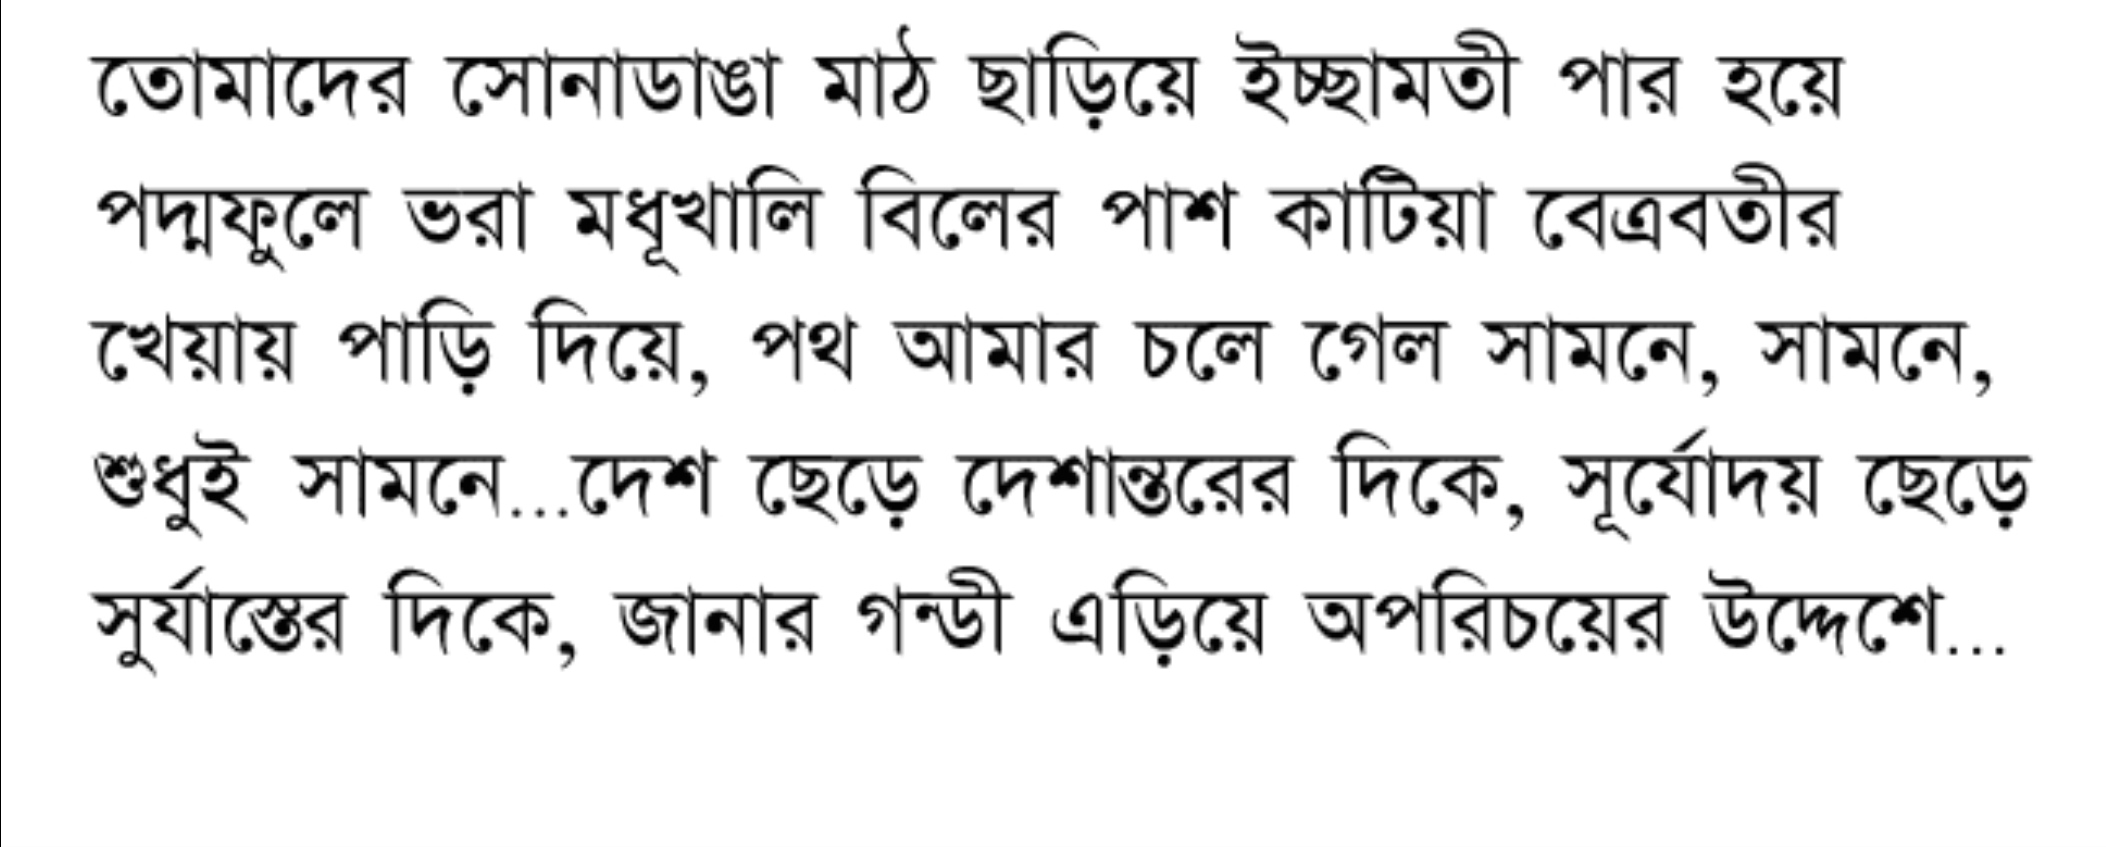

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
#original = cv2.imread("img.jpeg",cv2.IMREAD_GRAYSCALE)
original = cv2.imread("screenshot.jpg",cv2.IMREAD_GRAYSCALE)
cv2_imshow(original)

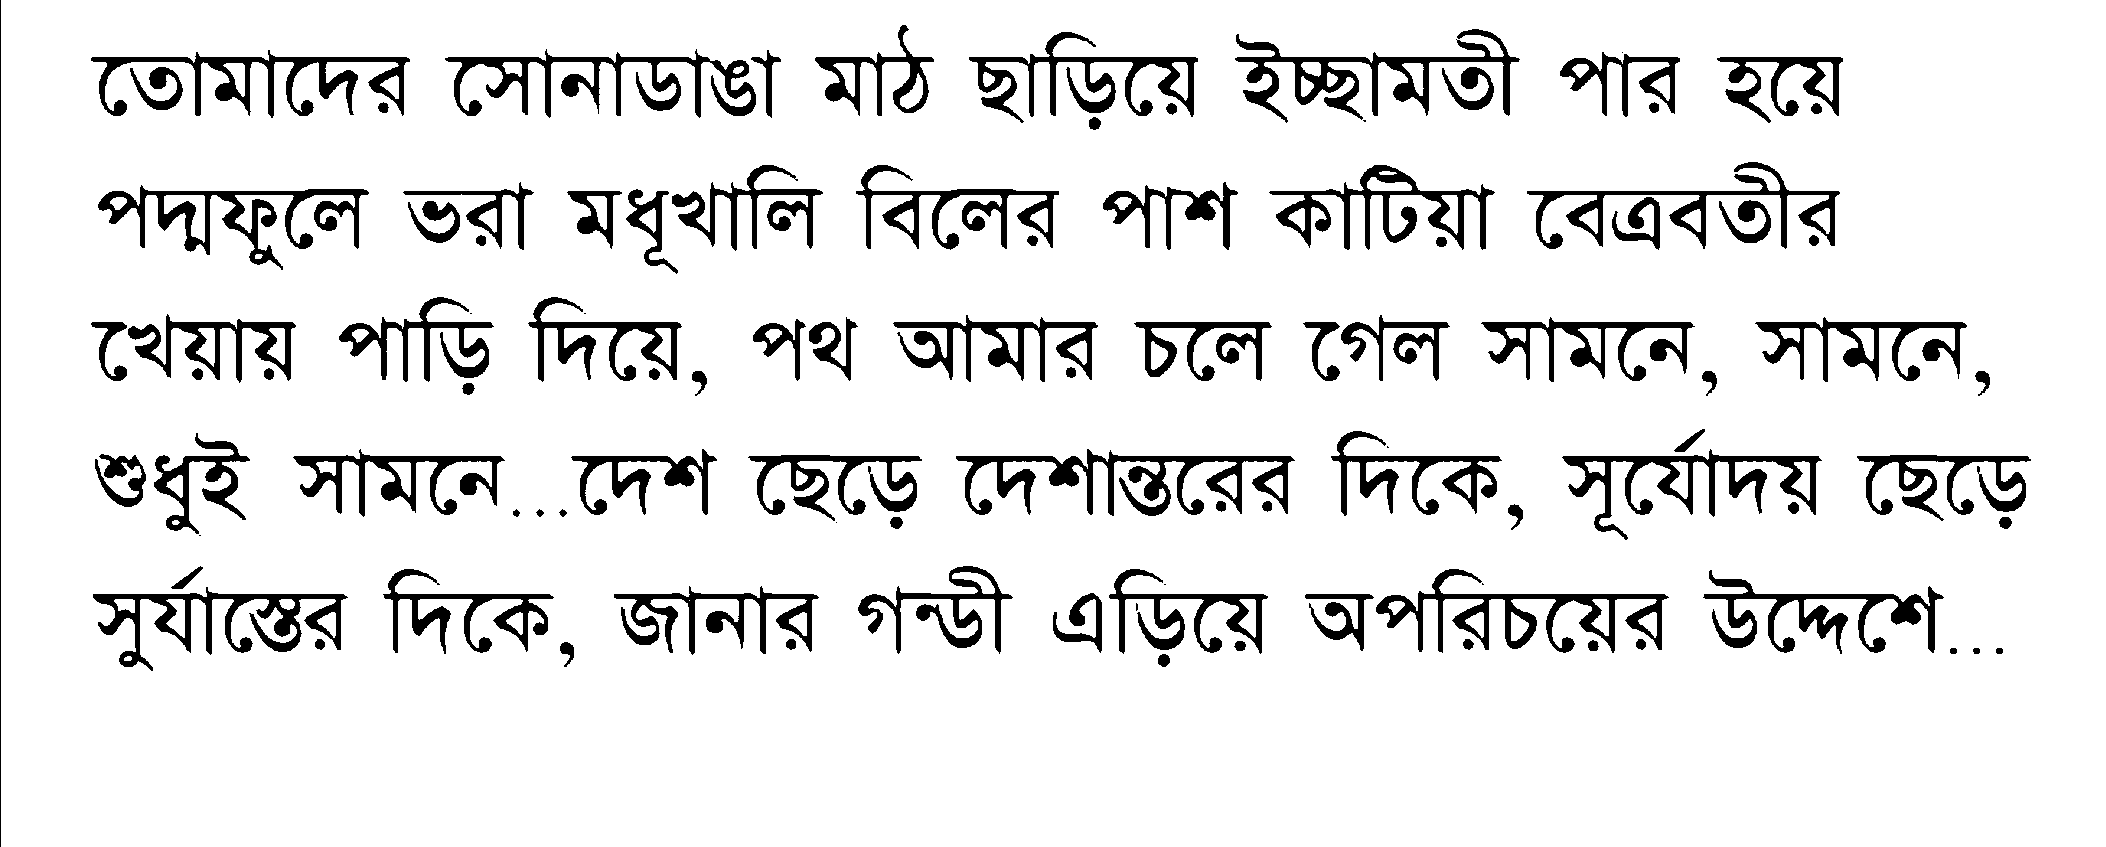

In [ ]:
#for detecting line segment
(thresh, img) = cv2.threshold(original, 130, 255,cv2.THRESH_BINARY)
cv2_imshow(img)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 25, 33, 49, 56, 65, 58, 58, 57, 44, 40, 37, 37, 61, 75, 84, 86, 85, 79, 76, 75, 39, 36, 41, 48, 59, 69, 96, 1350, 1407, 1427, 1453, 1468, 715, 560, 465, 422, 411, 417, 426, 435, 488, 503, 511, 536, 562, 572, 568, 556, 540, 538, 541, 535, 532, 542, 544, 544, 546, 552, 555, 541, 558, 566, 550, 526, 522, 504, 491, 473, 469, 453, 464, 478, 482, 481, 479, 469, 471, 459, 442, 402, 352, 325, 294, 217, 189, 138, 40, 32, 26, 24, 26, 26, 18, 13, 13, 12, 12, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 19, 24, 67, 85, 96, 105, 112, 114, 96, 70, 70, 72, 96, 106, 103, 99, 104, 96, 89, 73, 52, 48, 52, 53, 59, 73, 294, 397, 1351, 1391, 1404, 1410, 518, 447, 425, 388, 375, 398, 482, 527, 562, 623, 663, 691, 722, 707, 669, 633, 614, 598, 589, 585, 579, 578, 564, 551, 548, 525, 526, 522, 529, 533, 522, 493, 450, 429, 405, 373, 335, 347, 372, 390, 3

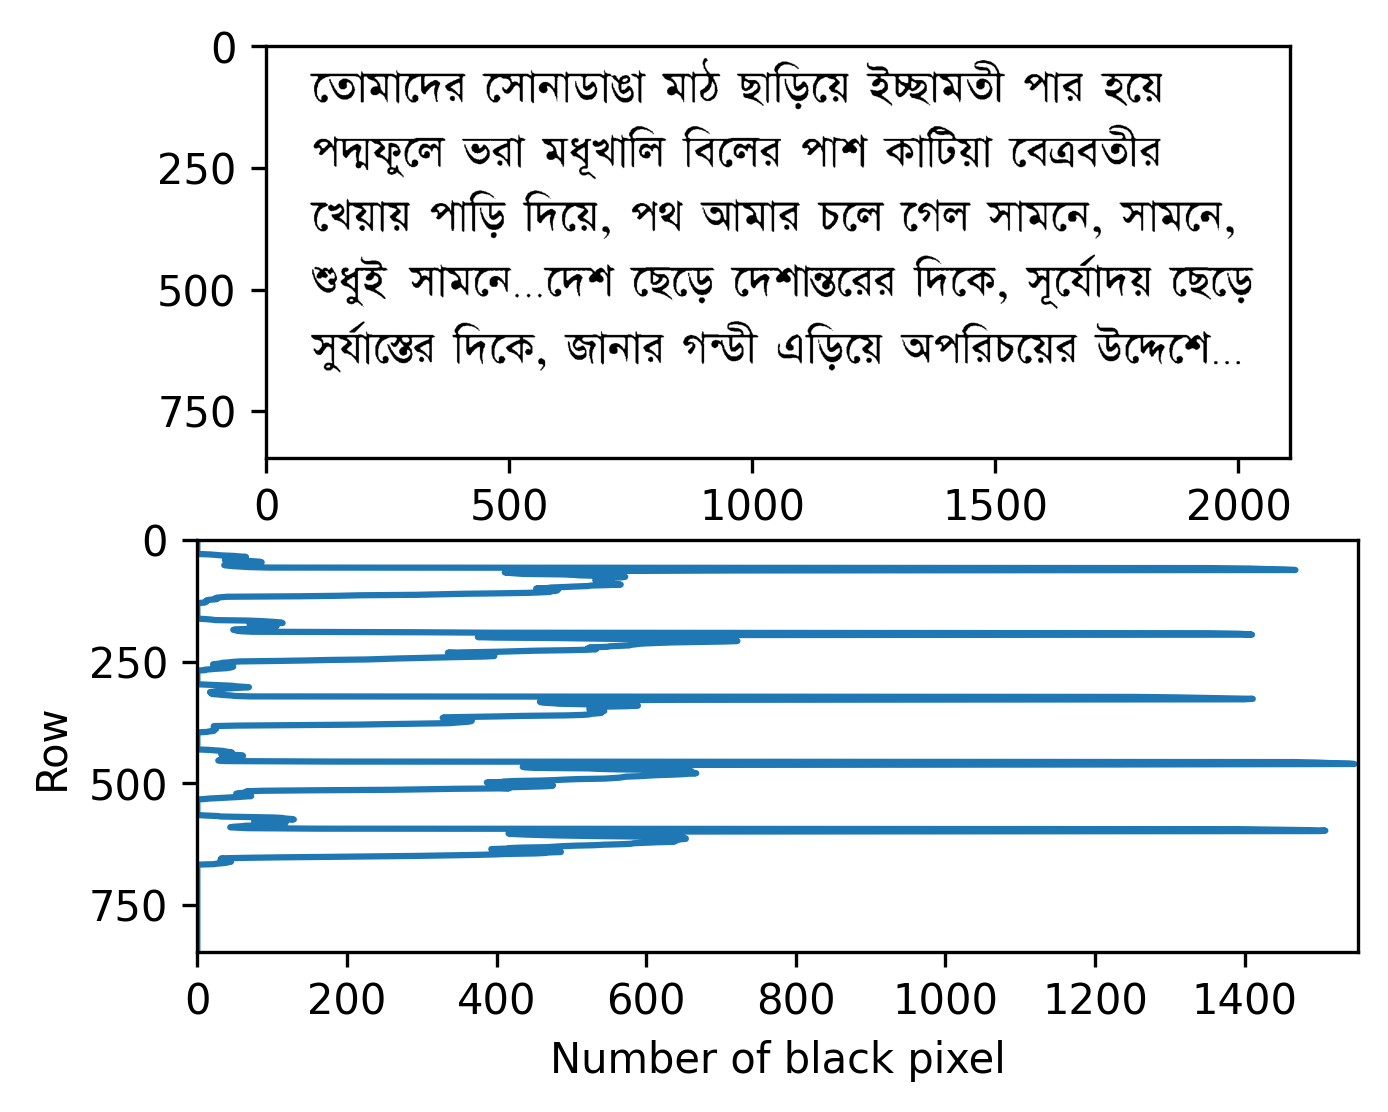

In [ ]:
#returns black pixel per row
def sum_of_row(im):
    sum_row=[]
    for x in range(im.shape[0]): #each row
        sum=0
        for y in range(im.shape[1]): #each column
            if im[x][y]==0: #if black pixel
                sum=sum+1
        sum_row.append(sum)
    return sum_row
 
sum_row=sum_of_row(img)
mx=max(sum_row)
 
#overlap of black pixel on segmentation line
sum_row=[0 if i<10 else i for i in sum_row]
 
print(sum_row)
x=range(len(sum_row))
 
fig=plt.figure(dpi=300)
ax1=fig.add_subplot(2,1,1)
ax1.imshow(img,cmap=plt.cm.gray)
 
ax2=fig.add_subplot(2,1,2)
#img.shape[0] represents height
plt.ylim(0,img.shape[0],1)
plt.xlim(0,mx+5,1)
plt.ylabel('Row')
plt.xlabel('Number of black pixel')
plt.gca().invert_yaxis()
ax2.set_aspect(0.65)
ax2.plot(sum_row,x)
fig.show()

In [ ]:
def get_line_split_point(sum_row):
    point=[]
    x=-1
    prev=1
    for i in range(len(sum_row)):
        x=x+1
        if sum_row[i]==0 and prev==1:
            prev=0
            point.append(x)
        elif sum_row[i]!=0:
            prev=1
        else:
            prev=0
 
    return point
 
#line split point
lsp=get_line_split_point(sum_row)
print(lsp)
rev=lsp[::-1] #reversed
print(rev)
diff= [rev[i]-rev[i+1] for i in range(len(rev)-1)]
max_diff=-1
if(len(diff)>0):
    max_diff=max(diff)
#maximum difference between two consecutive point
print(diff)

[0, 129, 268, 395, 533, 667]
[667, 533, 395, 268, 129, 0]
[134, 138, 127, 139, 129]


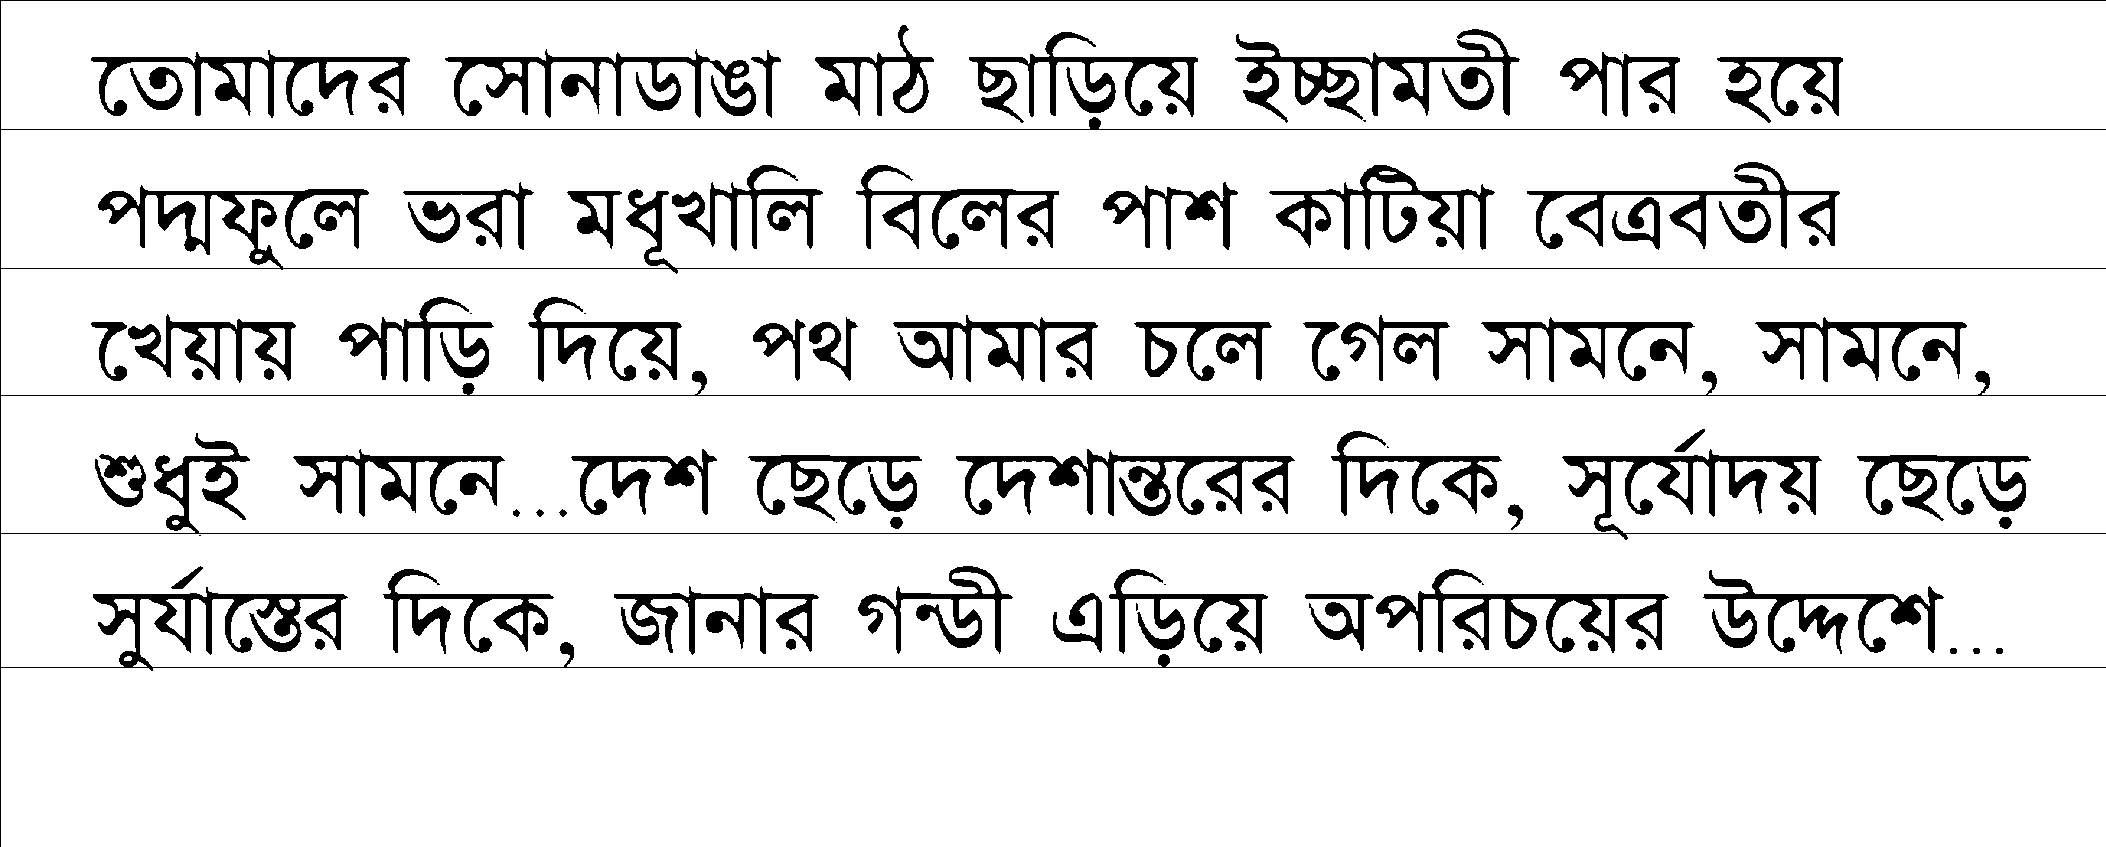

In [ ]:
from PIL import Image,ImageDraw
pil_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pil_img= Image.fromarray(pil_img)
draw = ImageDraw.Draw(pil_img) 
for point in lsp:
    draw.line((0,point,pil_img.width,point),fill=(0,0,0),width=1)
display(pil_img)

In [ ]:
kernel = np.ones((2,2), np.uint8)
#img=cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=1)
#img=cv2.erode(img,kernel,iterations = 1)
#img=cv2.dilate(img,kernel,iterations = 1)
 
def pre_process(ln):
        ln=255-ln
        (thresh, ln) = cv2.threshold(ln,114,255, cv2.THRESH_BINARY)
        ln=255-ln
        return ln
#ln=pre_process(ln)

line 1 :( 2106 130 )


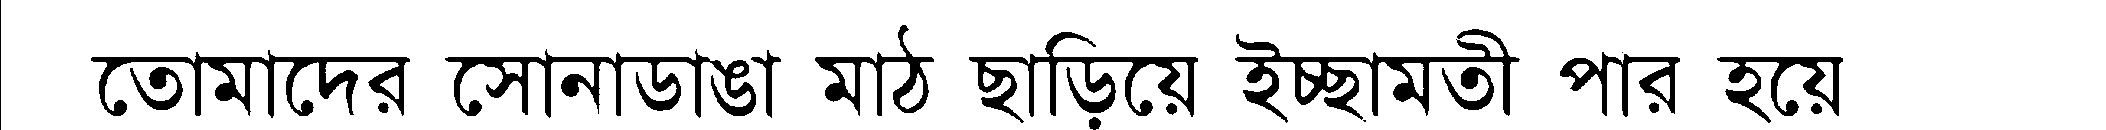

line 2 :( 2106 140 )


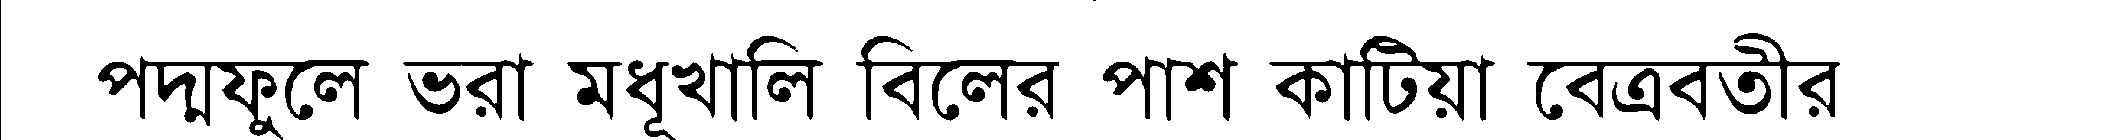

line 3 :( 2106 128 )


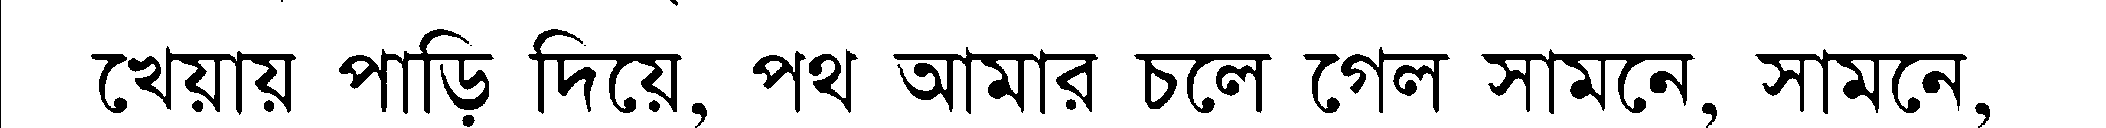

line 4 :( 2106 139 )


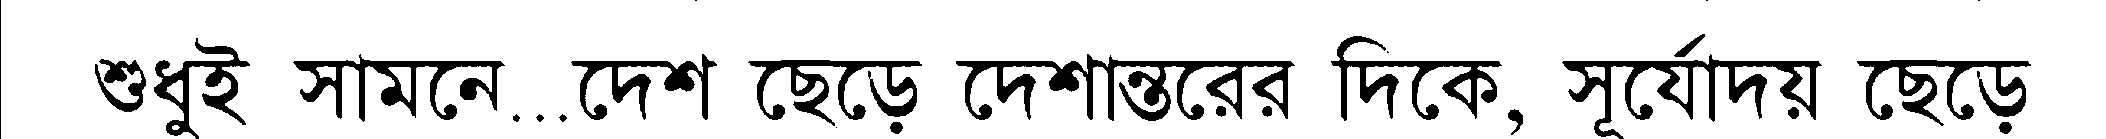

line 5 :( 2106 135 )


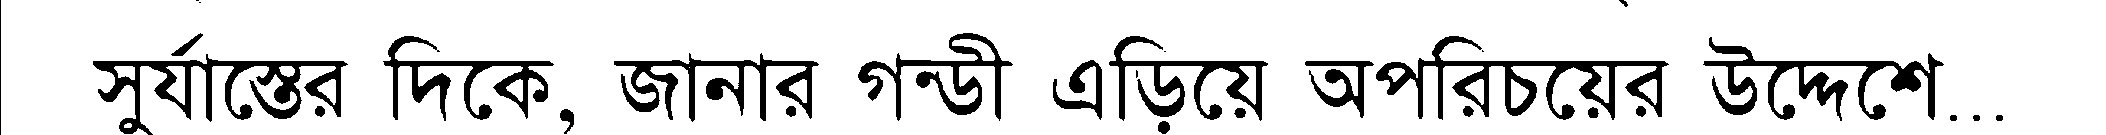

In [ ]:
lines = []
line_width=img.shape[1]
 
for i in range(len(lsp)-1):
    y=lsp[i]
    h=lsp[i+1]-lsp[i] #height
    x=0
    w=np.shape(original)[1]
    
    point_top=lsp[i]
    point_bottom=lsp[i+1]
    if sum(sum_row[point_top:point_bottom+1])>line_width*0.22:
        crop_img = img[y:y+h+1, x:x+w+1]
        lines.append(crop_img)
i=0
for line in lines:
    ln=line.copy()
    i=i+1
    print("line",i,":(",ln.shape[1],ln.shape[0],")")
    cv2_imshow(ln)

In [ ]:
#returns black pixel per column
def sum_of_col(im):
    sum_col=[]
    for y in range(np.shape(im)[1]): #each column
        sum=0
        for x in range(np.shape(im)[0]): #each row
            if im[x][y]==0:
                sum=sum+1
        sum_col.append(sum)
    return sum_col

[130, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 5, 5, 5, 5, 5, 5, 18, 25, 33, 36, 39, 44, 31, 30, 28, 24, 22, 21, 20, 18, 18, 25, 26, 25, 25, 26, 26, 25, 23, 23, 20, 18, 16, 13, 6, 6, 6, 10, 13, 14, 14, 14, 15, 15, 15, 16, 16, 15, 15, 15, 15, 15, 15, 14, 14, 14, 17, 26, 27, 30, 32, 33, 34, 35, 35, 36, 36, 36, 36, 35, 34, 34, 34, 23, 22, 20, 21, 20, 22, 23, 23, 23, 25, 27, 33, 30, 25, 21, 17, 9, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 8, 57, 64, 64, 62, 60, 58, 7, 6, 5, 6, 6, 6, 6, 8, 9, 10, 11, 11, 12, 12, 19, 23, 25, 28, 29, 31, 31, 32, 33, 31, 32, 31, 31, 31, 34, 33, 31, 28, 26, 24, 19, 15, 15, 14, 13, 13, 12, 12, 14, 18, 52, 53, 54, 58, 59, 12, 7, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 9, 58, 65, 62, 63, 63, 60, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 19, 29

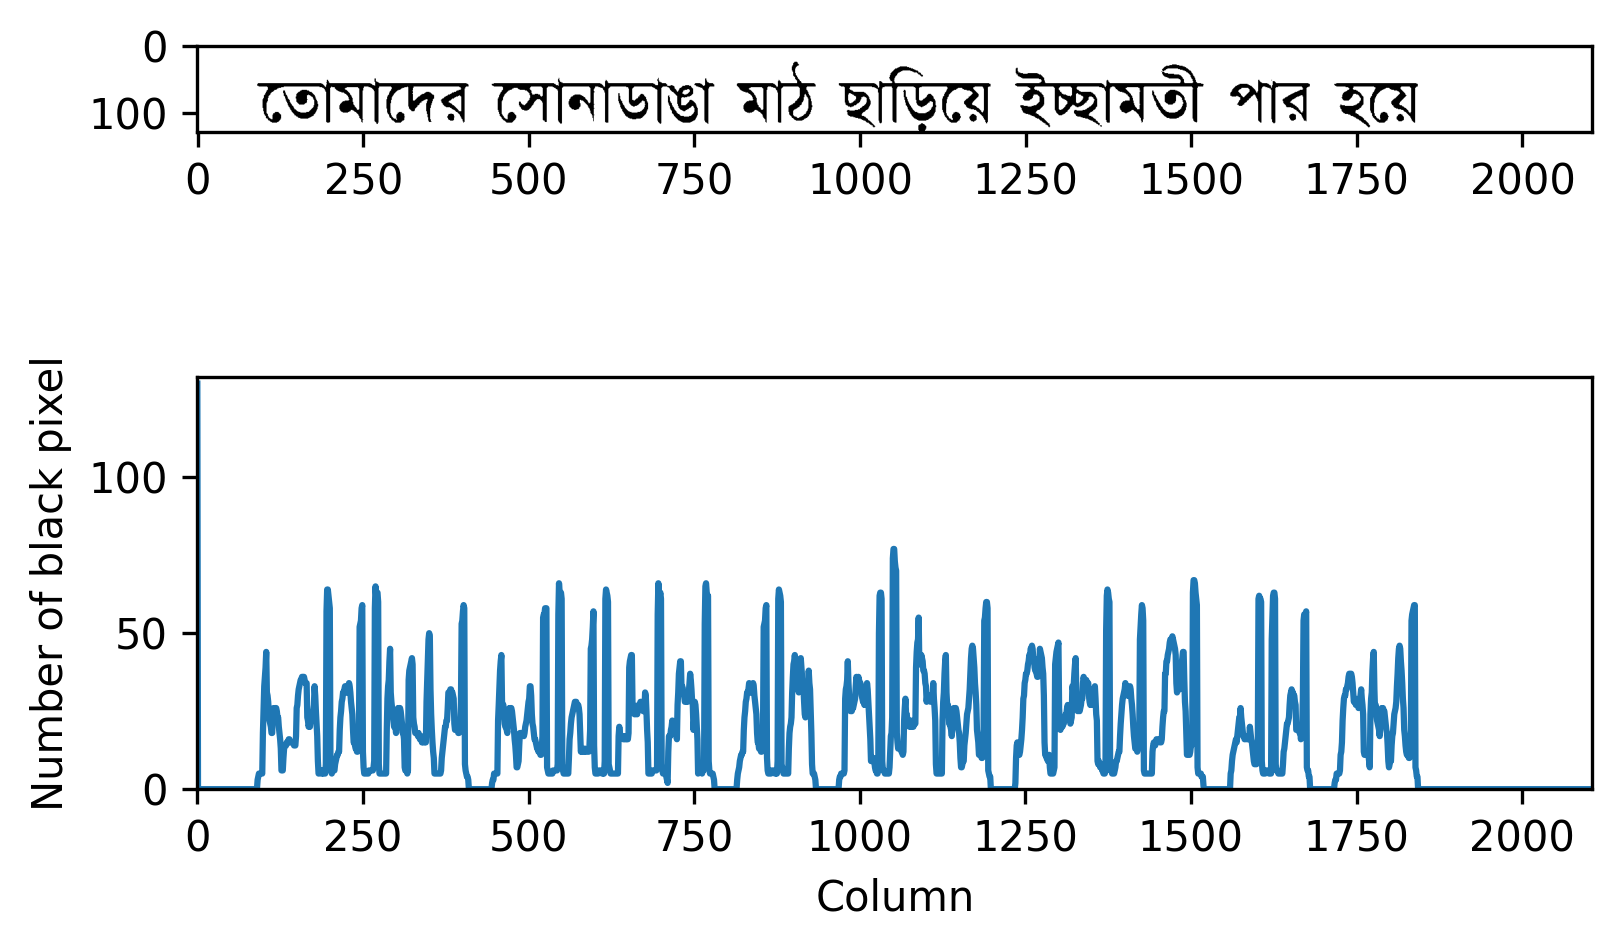

In [ ]:
sum_col=sum_of_col(lines[0])
mx=max(sum_col)
#sum_col=[0 if i<0 else i for i in sum_col]
print(sum_col)
 
 
fig=plt.figure(dpi=300)
ax1=fig.add_subplot(2,1,1)
ax1.imshow(lines[0],cmap=plt.cm.gray)
 
 
ax2=fig.add_subplot(2,1,2)
#img.shape[0] represents height
plt.xlim(0,lines[0].shape[1],1)
plt.ylim(0,mx+2,1)
plt.xlabel('Column')
plt.ylabel('Number of black pixel')
ax2.plot(sum_col)
plt.show()

In [ ]:
def get_word_split_point(sum_col,lim=0):
    point=[]
    x=-1
    prev=1
    for i in range(len(sum_col)-lim):
        x=x+1
        if sum(sum_col[i:i+lim+1])==0 and prev==1:
            prev=0
            point.append(x)
        elif sum_col[i]!=0:
            prev=1
        else:
            prev=0
 
    return point
 
#word split point
wsp=get_word_split_point(sum_col)
print(wsp)
rev=wsp[::-1] #reversed
print(rev)
diff= [rev[i]-rev[i+1] for i in range(len(rev)-1)]
max_diff=-1
if(len(diff)>0):
    max_diff=max(diff)
#maximum difference between two consecutive point
print(diff)

[1, 410, 781, 934, 1198, 1520, 1680, 1843]
[1843, 1680, 1520, 1198, 934, 781, 410, 1]
[163, 160, 322, 264, 153, 371, 409]


In [ ]:
 
wsp2=[]
wsp2.append(rev[0])
prev=rev[0]
for i in range(1,len(rev)):
    if (prev-rev[i])>=20:
        wsp2.append(rev[i])
        prev=rev[i]
 
wsp2=wsp2[::-1]
print(wsp2)

[1, 410, 781, 934, 1198, 1520, 1680, 1843]


word 1 :


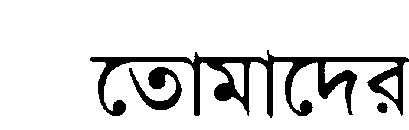

word 2 :


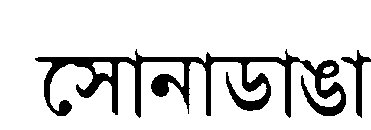

word 3 :


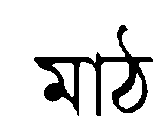

word 4 :


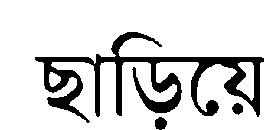

word 5 :


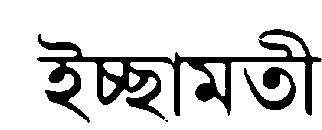

word 6 :


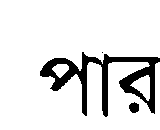

word 7 :


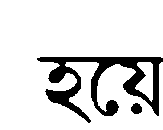

In [ ]:
words = []
 
for i in range(len(wsp2)-1):
    x=wsp2[i]
    w=wsp2[i+1]-wsp2[i] #width
    y=0
    h=lines[0].shape[0]
    crop_img = lines[0][y:y+h, x:x+w]
    words.append(crop_img)
i=0
for word in words:
    wd=word.copy()
    i=i+1
    print("word",i,":")
    cv2_imshow(wd)

In [ ]:
 
 
#returns black pixel per row
def sum_of_1_row(im,x):
    sum=0
    for y in range(im.shape[1]): #each column
        if im[x][y]==0: #if black pixel
            sum=sum+1
    
    return sum
 
#returns black pixel per column
def sum_of_1_col(im,y):
    sum_col=[]
 
    sum=0
    for x in range(np.shape(im)[0]): #each row
       if im[x][y]==0:
           sum=sum+1
 
    return sum
 
def crop_sides_word(im):
    top=0
    bottom=im.shape[0]-1
    left=0
    right=im.shape[1]-1
 
    #find left
    for i in range(im.shape[1]):
        if sum_of_1_col(im,i)>0:
            left=i
            break
    
    #find right
    for i in range(right,left,-1):
        if sum_of_1_col(im,i)>0:
            right=i
            break
 
    #find top
    for i in range(im.shape[0]):
        if sum_of_1_row(im,i)>0:
            top=i
            break
    #find bottom
    for i in range(bottom,top,-1):
        if sum_of_1_row(im,i)>0:
            bottom=i
            break
 
    crop = im[top:bottom+1, left:right+1]
    
    return crop

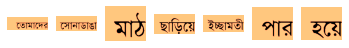

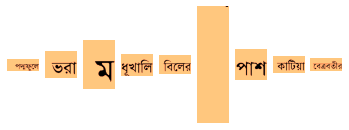

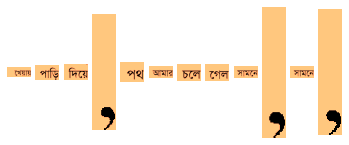

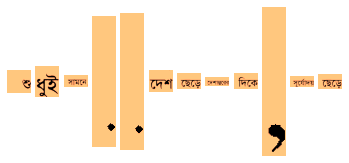

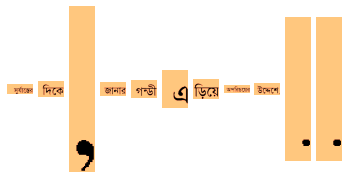

In [ ]:
word_in_line=[]
all_the_words=[]
for line in lines:
 
    words = []
    sum_col=sum_of_col(line)
    mx=max(sum_col)
 
    wsp=get_word_split_point(sum_col,lim=3)
    rev=wsp[::-1] #reversed
 
    diff= [rev[i]-rev[i+1] for i in range(len(rev)-1)]
    max_diff=-1
    if(len(diff)>0):
        max_diff=max(diff)
    #maximum difference between two consecutive lines
     
 
    wsp2=[]
    wsp2.append(rev[0])
    prev=rev[0]
    for i in range(1,len(rev)):
        if (prev-rev[i])>=20:#max=33
            wsp2.append(rev[i])
            prev=rev[i]
 
    wsp2=wsp2[::-1]
    #wsp2=wsp
 
    for i in range(len(wsp2)-1):
        x=wsp2[i]
        w=wsp2[i+1]-wsp2[i] #width
        y=0
        h=line.shape[0]
        crop_img = line[:, x:x+w+1]
        #crop_img=crop_sides_word(crop_img)
        words.append(crop_img)
        all_the_words.append(crop_img)
     
    word_in_line.append(words)
 
r=0
for i in word_in_line:
    r=r+1
    c=0
    fig=plt.figure()
    for word in i:
        c=c+1
        ax=fig.add_subplot(1,len(i),c)
        plt.axis("off")
        plt.imshow(word,cmap=plt.cm.copper)
plt.show()

In [ ]:
def sum_of_col_custom(im,top=0,bot=0):
    sum_col=[]
    for y in range(im.shape[1]): #read each colum
        sum=0
        for x in range(top,bot+1,1): # read all row per column
            if im[x][y]==0:
                sum=sum+1
        sum_col.append(sum)
    return sum_col

73
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 8, 9, 10, 10, 10, 10, 10, 10, 9, 9, 10, 10, 12, 17, 22, 25, 25, 27, 27, 28, 29, 28, 28, 28, 28, 28, 26, 24, 18, 19, 20, 19, 19, 19, 19, 21, 22, 22, 22, 20, 19, 18, 18, 20, 25, 26, 23, 19, 17, 12, 0, 0, 0, 0, 0, 0, 2, 6, 7, 10, 12, 13, 14, 15, 17, 18, 23, 26, 27, 25, 26, 25, 25, 24, 24, 21, 14, 14, 14, 14, 15, 13, 13, 12, 12, 16, 24, 48, 50, 50, 50, 50, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 5, 6, 50, 50, 50, 50, 50, 50, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 91, 134, 157]


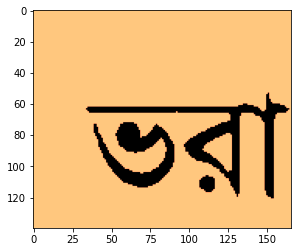

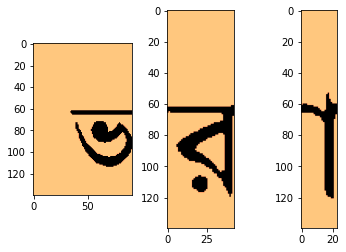

In [ ]:
chars=[]
 
wrd=all_the_words[8]
 
plt.imshow(wrd,cmap=plt.cm.copper)
 
sum_row=sum_of_row(wrd)
head_line=sum_row.index(max(sum_row))
for i in range(head_line,wrd.shape[0]):
    if sum_row[i]<sum_row[head_line]*0.97:
        head_line=i
        break
 
bottom=wrd.shape[0]-1
 
#distant between bottom and head_line
dist=bottom-head_line
print(dist)
 
 
def get_char_split_point(wrd,lim=1):
    point=[]
    x=-1
    prev=1
    s=sum_of_col_custom(wrd,head_line,int(head_line+dist*0.68))
    print(s)
    for i in range(wrd.shape[1]-lim):
        x=x+1
        if sum(s[i:i+lim])==0 and prev==1:
            prev=0
            point.append(x)
        elif s[i]!=0:
            prev=1
        else:
            prev=0
        if i==(wrd.shape[1]-lim-1) and s[i]>0:
            point.append(x)
 
    return point
 
csp=get_char_split_point(wrd,lim=1)
print(csp)
 
rev=csp[::-1] #reversed
 
diff= [rev[i]-rev[i+1] for i in range(len(rev)-1)]
max_diff=-1
if(len(diff)>0):
    max_diff=max(diff)
#maximum difference between two consecutive lines
     
for i in range(len(csp)-1):
    x=csp[i]
    w=csp[i+1]-csp[i] #width     
    y=0
    crop_img = wrd[y:, x:x+w]
    if crop_img.size>0:
        sc=32.0/w
        #crop_img = cv2.resize(crop_img,(32,int(crop_img.shape[0]*sc)))
        chars.append(crop_img)
 
 
c=0
cnt=0
fig=plt.figure()
for i in chars:
    cnt+=1
    fig.add_subplot(1,len(chars),cnt)
    plt.imshow(i,cmap=plt.cm.copper)
 
plt.show()

In [ ]:
def crop_sides(im):
    top=0
    bottom=im.shape[0]-1
    left=0
    right=im.shape[1]-1
    sum_row=sum_of_row(im)
    sum_col=sum_of_col(im)
 
    #find left
    for i in range(im.shape[1]):
        if sum_col[i]>0:
            left=i
            break
    
    #find right
    for i in range(right,left,-1):
        if sum_col[i]>0:
            right=i
            break
 
    #find top
    for i in range(im.shape[0]):
        if sum_row[i]>0:
            top=i
            break
    #find bottom
    for i in range(bottom,top,-1):
        if sum_row[i]>0:
            bottom=i
            break
 
    crop = im[top:bottom+1, left:right+1]
    
    if crop.size<10:
        return False
     
    sum_mid_row=0
    for y in range(crop.shape[1]): #each column
        if crop[int(crop.shape[0]/2.0)][y]==0: #if black pixel
            sum_mid_row+=1
    if sum_mid_row==0:
        return False
    else:
        return crop

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 20, 28, 31, 34, 38, 24, 23, 19, 14, 13, 12, 10, 9, 8, 12, 13, 12, 12, 13, 13, 12, 11, 11, 9, 8, 7, 6, 1, 1, 1, 5, 8, 9, 9, 9, 10, 10, 10, 11, 11, 10, 10, 10, 10, 10, 10, 9, 9, 9, 12, 21, 22, 25, 26, 27, 28, 28, 28, 29, 29, 29, 29, 28, 27, 27, 27, 16, 15, 14, 15, 15, 17, 18, 18, 18, 20, 22, 28, 25, 20, 16, 12, 4, 0, 0, 1, 1, 1, 1, 2, 2, 3, 4, 5, 8, 46, 46, 46, 46, 46, 46, 2, 1, 0, 1, 1, 1, 1, 3, 4, 5, 6, 6, 7, 7, 14, 18, 20, 23, 24, 26, 26, 27, 28, 26, 27, 26, 26, 26, 29, 28, 26, 23, 21, 19, 14, 10, 10, 9, 8, 8, 7, 7, 9, 13, 46, 46, 46, 46, 46, 6, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 4, 5, 7, 46, 46, 46, 46, 46, 46, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 24, 28, 30, 36, 39, 25, 20, 17

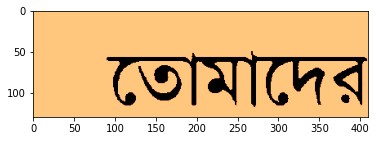

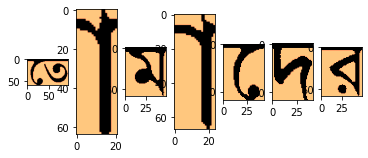

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 22, 28, 33, 36, 38, 21, 19, 18, 14, 12, 11, 10, 9, 8, 11, 12, 13, 12, 13, 13, 12, 11, 10, 9, 7, 6, 5, 2, 2, 3, 4, 9, 13, 13, 13, 13, 13, 13, 12, 13, 15, 16, 17, 19, 21, 23, 24, 28, 28, 25, 19, 16, 15, 13, 11, 11, 10, 9, 8, 8, 7, 7, 7, 6, 6, 8, 12, 46, 46, 46, 46, 46, 46, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 4, 4, 6, 46, 46, 46, 46, 46, 46, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 11, 13, 16, 18, 19, 20, 21, 22, 23, 23, 23, 22, 22, 22, 21, 19, 13, 7, 8, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 9, 14, 40, 41, 43, 46, 46, 9, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 5, 5, 9, 46, 46, 46, 46, 46, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 15, 13, 12, 12, 12, 12, 11, 12, 11, 11, 11, 12, 11, 11, 12, 33, 34, 35, 36, 36, 19, 19, 17, 16, 16, 17, 18, 17, 19, 20, 19, 20, 21, 22, 21, 21, 20, 21, 20, 26, 25, 20, 14, 10, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 4, 4, 5, 46, 46, 

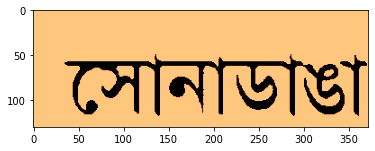

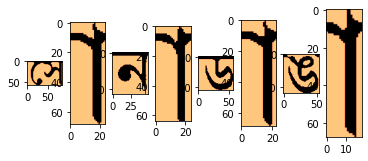

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 5, 6, 6, 7, 7, 14, 18, 20, 23, 24, 26, 26, 27, 29, 26, 27, 26, 26, 26, 29, 28, 25, 23, 21, 19, 13, 10, 10, 8, 8, 8, 7, 7, 9, 14, 46, 46, 46, 46, 46, 5, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 5, 5, 9, 46, 46, 46, 46, 46, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 8, 13, 15, 16, 18, 19, 20, 14, 12, 11, 13, 13, 12, 13, 13, 15, 17, 28, 29, 28, 26, 25, 24, 20, 17, 16, 20, 20, 20, 22, 33, 29, 27, 20, 13, 3, 0, 0, 0, 0, 0, 0]
[0, 81, 104, 148]


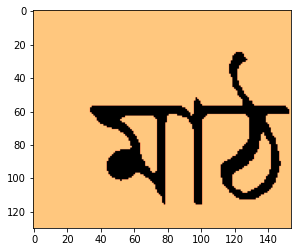

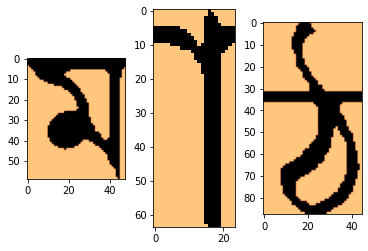

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 24, 27, 28, 30, 36, 29, 25, 21, 20, 21, 20, 21, 21, 22, 23, 24, 27, 30, 29, 28, 29, 28, 27, 27, 25, 22, 20, 19, 18, 17, 18, 16, 17, 23, 21, 19, 15, 10, 6, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 4, 7, 45, 46, 46, 46, 46, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 46, 46, 46, 46, 46, 46, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 11, 15, 18, 13, 13, 12, 12, 12, 11, 11, 12, 11, 12, 11, 11, 11, 10, 10, 28, 33, 34, 35, 35, 17, 16, 16, 17, 16, 16, 17, 17, 17, 17, 19, 19, 21, 21, 22, 22, 22, 22, 23, 24, 24, 29, 24, 21, 17, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 23, 26, 32, 36, 38, 25, 19, 18, 16, 12, 11, 10, 9, 8, 11, 11, 13, 12, 13, 13, 12, 11, 10, 9, 8, 7, 4, 2, 2, 3, 4, 4, 9, 11, 13, 16, 19, 20, 21, 24, 25, 28, 32, 34, 35, 34, 30, 28, 24, 21, 18, 14, 12, 10, 6, 6, 6, 6, 5, 5, 8, 13, 46, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0]
[0, 83, 104, 124, 182, 261]


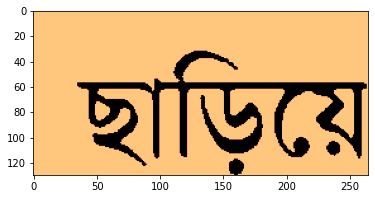

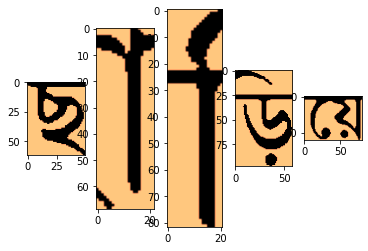

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 7, 10, 17, 18, 22, 23, 25, 25, 26, 27, 28, 30, 29, 32, 32, 33, 32, 29, 29, 26, 25, 24, 23, 21, 22, 23, 23, 28, 26, 24, 20, 18, 16, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 35, 37, 39, 40, 41, 42, 21, 17, 14, 16, 16, 15, 16, 16, 17, 18, 19, 19, 21, 22, 21, 20, 19, 16, 17, 18, 28, 27, 28, 32, 35, 37, 26, 21, 20, 21, 21, 20, 21, 22, 24, 24, 28, 30, 29, 28, 28, 28, 27, 27, 26, 22, 19, 18, 18, 17, 18, 17, 18, 21, 22, 19, 15, 12, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 5, 6, 46, 46, 46, 46, 46, 46, 3, 1, 1, 0, 0, 0, 0, 1, 2, 4, 4, 5, 6, 7, 7, 12, 16, 19, 22, 24, 25, 26, 27, 29, 28, 28, 25, 26, 25, 25, 28, 27, 24, 22, 19, 15, 12, 10, 8, 8, 8, 7, 8, 10, 12, 43, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 9, 10, 9, 9, 10, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 9, 9, 9, 21, 21, 25, 24, 26, 28, 28, 28, 29, 29, 29, 29, 28, 27, 27, 2

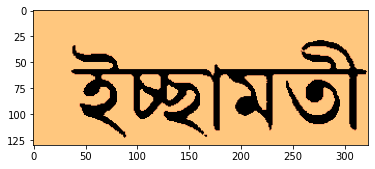

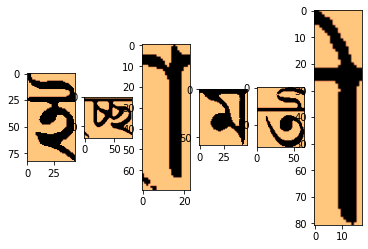

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 9, 11, 12, 13, 14, 15, 15, 14, 15, 17, 18, 20, 19, 22, 19, 17, 15, 13, 13, 12, 12, 13, 13, 12, 13, 14, 14, 18, 17, 15, 15, 13, 11, 9, 8, 8, 8, 8, 10, 15, 46, 46, 46, 46, 46, 3, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 5, 44, 46, 46, 46, 46, 46, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 7, 8, 10, 12, 14, 16, 16, 17, 18, 21, 22, 22, 22, 21, 21, 20, 21, 19, 19, 14, 14, 14, 14, 14, 13, 14, 11, 12, 15, 23, 46, 46, 46, 46, 46, 2, 1, 1, 0, 0, 0]
[0, 89, 112, 158]


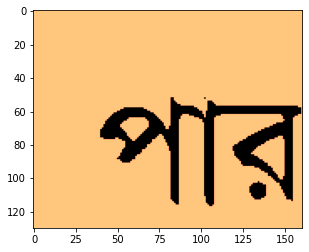

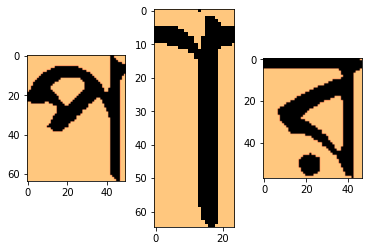

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 7, 10, 17, 21, 24, 25, 25, 27, 27, 28, 29, 31, 32, 32, 32, 32, 31, 29, 26, 23, 24, 24, 21, 20, 20, 20, 18, 19, 19, 20, 21, 17, 14, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 24, 26, 33, 37, 38, 25, 17, 18, 14, 12, 11, 10, 9, 8, 11, 12, 13, 12, 13, 12, 12, 11, 10, 9, 8, 6, 4, 2, 3, 4, 4, 9, 12, 13, 16, 19, 20, 21, 23, 25, 28, 32, 34, 35, 34, 30, 27, 24, 19, 17, 14, 12, 9, 7, 6, 6, 6, 5, 5, 6, 10, 46, 46, 46, 46, 46, 46, 2, 1, 0, 0, 0]
[0, 81, 161]


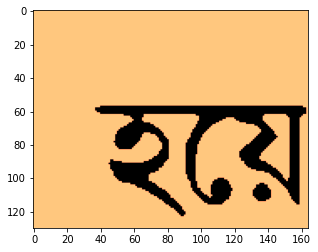

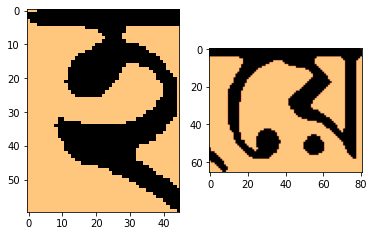

73
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 8, 9, 11, 13, 14, 14, 15, 15, 14, 14, 17, 17, 20, 23, 21, 19, 17, 15, 14, 13, 12, 12, 12, 12, 13, 13, 13, 15, 17, 16, 15, 14, 12, 11, 10, 8, 8, 7, 8, 9, 13, 50, 50, 50, 50, 50, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 29, 31, 32, 33, 34, 35, 18, 17, 15, 14, 14, 13, 13, 13, 11, 12, 11, 11, 10, 11, 11, 10, 10, 10, 11, 10, 12, 28, 41, 44, 44, 43, 42, 31, 24, 20, 18, 13, 7, 7, 6, 5, 4, 5, 4, 2, 4, 50, 50, 50, 50, 50, 4, 1, 0, 0, 0, 0, 0, 1, 2, 2, 3, 4, 7, 8, 12, 16, 18, 19, 21, 24, 25, 26, 28, 30, 31, 29, 27, 24, 23, 21, 19, 17, 15, 14, 9, 6, 6, 6, 6, 7, 8, 13, 44, 45, 45, 46, 46, 46, 9, 9, 8, 12, 15, 17, 17, 19, 19, 19, 20, 19, 18, 21, 19, 17, 12, 9, 4, 0, 0, 0, 0, 0, 0, 0, 0, 12, 21, 28, 31, 34, 3

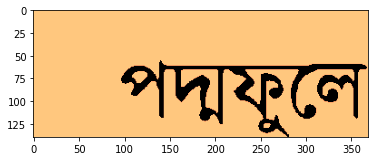

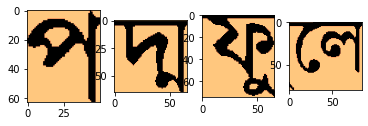

73
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 8, 9, 10, 10, 10, 10, 10, 10, 9, 9, 10, 10, 12, 17, 22, 25, 25, 27, 27, 28, 29, 28, 28, 28, 28, 28, 26, 24, 18, 19, 20, 19, 19, 19, 19, 21, 22, 22, 22, 20, 19, 18, 18, 20, 25, 26, 23, 19, 17, 12, 0, 0, 0, 0, 0, 0, 2, 6, 7, 10, 12, 13, 14, 15, 17, 18, 23, 26, 27, 25, 26, 25, 25, 24, 24, 21, 14, 14, 14, 14, 15, 13, 13, 12, 12, 16, 24, 48, 50, 50, 50, 50, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 5, 6, 50, 50, 50, 50, 50, 50, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 91, 134, 157]


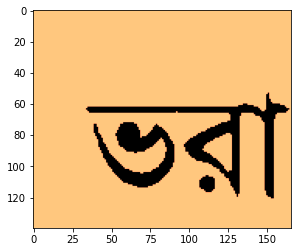

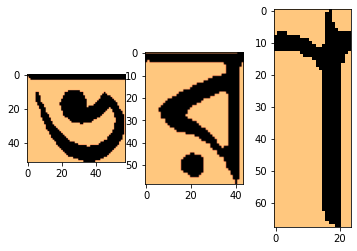

74
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 5, 6, 7, 7, 8, 8, 14, 19, 21, 25, 25, 27, 27, 28, 28, 29, 26, 27, 26, 27, 31, 30, 27, 25, 23, 20, 16, 11, 10, 9, 8, 9, 8, 8, 10, 14, 48, 49, 50, 51, 51, 51, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[0, 86]


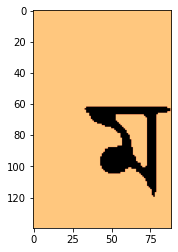

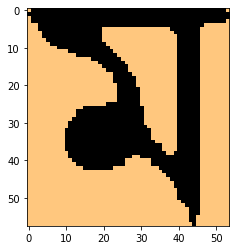

73
[0, 0, 0, 0, 2, 4, 11, 16, 20, 22, 24, 27, 28, 25, 24, 26, 27, 24, 23, 21, 18, 17, 17, 16, 16, 17, 15, 16, 15, 15, 15, 14, 17, 22, 47, 50, 50, 50, 50, 50, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 10, 11, 12, 12, 14, 17, 18, 18, 18, 18, 19, 20, 21, 20, 22, 23, 23, 24, 23, 23, 23, 23, 22, 23, 25, 28, 28, 24, 21, 19, 14, 6, 6, 7, 7, 8, 47, 50, 50, 50, 49, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 4, 6, 50, 50, 50, 50, 50, 50, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 50, 50, 50, 50, 50, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 10, 16, 21, 22, 23, 17, 17, 17, 16, 15, 16, 21, 22, 22, 22, 23, 23, 23, 20, 19, 18, 14, 11, 8, 11, 12, 14, 14, 11, 10, 9, 9, 8, 8, 7, 6, 7, 7, 9, 39, 50, 50, 50, 50, 50, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 41, 95, 116, 137, 193]


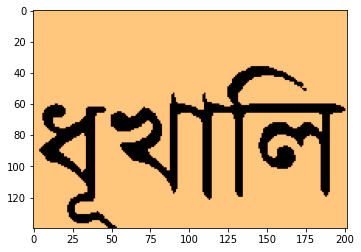

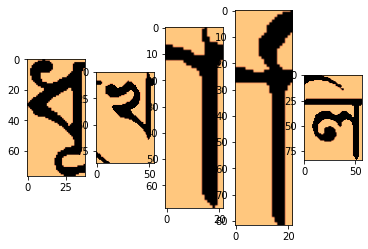

73
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 50, 50, 50, 50, 50, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 7, 9, 11, 13, 14, 16, 16, 17, 18, 19, 18, 17, 16, 17, 17, 16, 17, 16, 16, 15, 16, 15, 15, 13, 14, 14, 13, 15, 19, 30, 49, 50, 50, 50, 50, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 25, 28, 32, 36, 40, 27, 20, 19, 18, 15, 13, 12, 11, 11, 16, 16, 17, 16, 16, 16, 15, 15, 14, 14, 12, 9, 1, 0, 0, 12, 16, 19, 21, 23, 20, 18, 17, 16, 16, 18, 20, 21, 22, 23, 23, 22, 22, 20, 19, 18, 15, 13, 8, 9, 11, 13, 15, 15, 10, 9, 8, 8, 7, 8, 6, 6, 5, 8, 44, 50, 50, 50, 50, 50, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 7, 8, 11, 13, 13, 15, 16, 18, 21, 24, 28, 26, 25, 24, 25, 25, 24, 22, 19, 14, 14, 14, 14, 13, 13, 12, 12, 16, 23, 48, 49, 50, 50, 50, 4, 0, 0, 0, 0, 0, 0]
[0, 50, 98, 137, 186, 231]


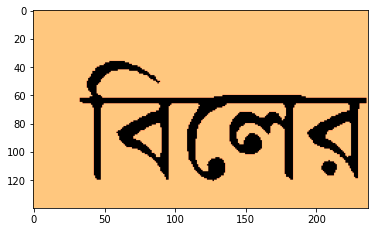

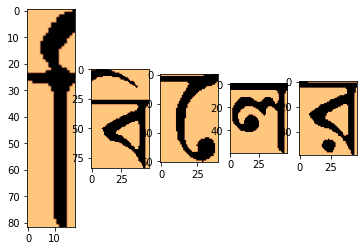

138
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]


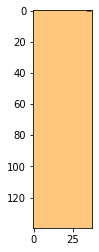

<Figure size 432x288 with 0 Axes>

73
[0, 0, 0, 0, 0, 0, 0, 6, 8, 10, 12, 13, 13, 15, 15, 15, 14, 16, 16, 20, 21, 23, 20, 18, 16, 15, 14, 13, 12, 13, 13, 12, 14, 14, 13, 16, 17, 16, 15, 14, 11, 11, 9, 8, 7, 7, 9, 9, 15, 50, 50, 50, 50, 50, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 7, 49, 50, 50, 50, 50, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 8, 13, 14, 16, 17, 19, 21, 25, 25, 24, 22, 21, 20, 21, 22, 22, 23, 24, 25, 25, 25, 25, 23, 22, 19, 17, 17, 13, 11, 7, 6, 6, 6, 5, 5, 6, 7, 49, 50, 50, 50, 50, 50, 50, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 56, 77, 135]


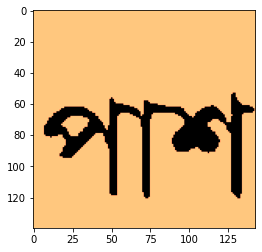

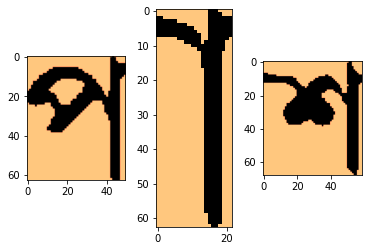

73
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 8, 9, 11, 13, 14, 16, 17, 18, 18, 20, 18, 16, 15, 16, 16, 16, 15, 13, 15, 15, 15, 14, 14, 13, 12, 15, 22, 47, 48, 49, 50, 50, 50, 12, 8, 7, 7, 12, 15, 16, 17, 19, 19, 19, 20, 19, 19, 20, 21, 20, 16, 13, 8, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 4, 6, 7, 50, 50, 50, 50, 50, 50, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 50, 50, 50, 50, 50, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 35, 38, 40, 42, 44, 45, 12, 8, 7, 6, 7, 7, 8, 8, 8, 8, 8, 8, 13, 17, 19, 22, 24, 25, 26, 28, 27, 26, 26, 23, 22, 20, 15, 8, 0, 0, 0, 0, 0, 1, 2, 2, 3, 4, 4, 9, 12, 14, 17, 18, 20, 21, 22, 28, 33, 35, 38, 38, 36, 33, 30, 28, 26, 20, 14, 12, 9, 6, 6, 6, 6, 5, 6, 5, 11, 49, 50, 50, 50, 50, 50, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 6, 7, 50, 50, 50, 50, 50, 50, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 93, 113, 134, 179, 227, 250]


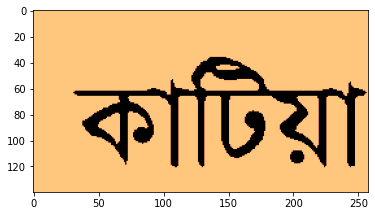

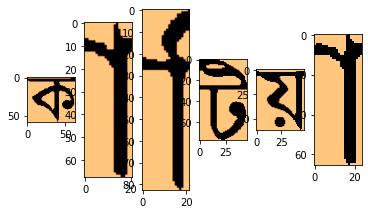

73
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 27, 30, 35, 39, 28, 22, 20, 20, 17, 13, 12, 11, 10, 14, 15, 17, 17, 16, 16, 16, 15, 14, 14, 12, 11, 5, 1, 0, 0, 2, 4, 6, 9, 11, 13, 14, 14, 16, 17, 18, 19, 20, 17, 16, 17, 17, 16, 17, 16, 16, 15, 15, 15, 15, 15, 14, 14, 14, 13, 14, 23, 49, 50, 50, 50, 50, 3, 1, 0, 0, 0, 0, 0, 0, 0, 9, 13, 20, 25, 19, 11, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 15, 19, 23, 26, 28, 29, 31, 32, 33, 34, 31, 29, 28, 27, 25, 21, 16, 16, 15, 14, 14, 12, 12, 11, 12, 16, 45, 45, 44, 43, 43, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 7, 9, 11, 13, 14, 15, 16, 17, 18, 19, 18, 17, 17, 17, 16, 15, 17, 16, 16, 15, 16, 15, 16, 14, 14, 15, 14, 16, 22, 27, 49, 50, 50, 50, 50, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 9, 9, 9, 10, 10, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 19, 22, 24, 24, 27, 28, 30, 30, 30, 30, 30, 30, 30, 29, 28, 28, 25, 17, 17, 17, 16, 16, 16, 17, 19, 19, 22, 24, 27, 24, 18, 16

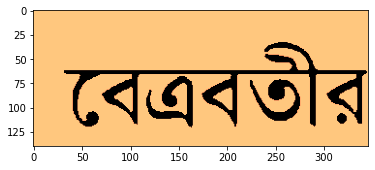

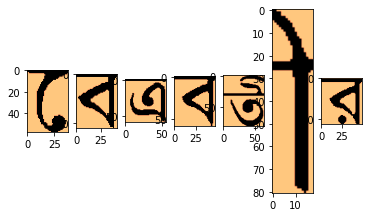

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 19, 27, 31, 33, 38, 26, 21, 17, 14, 12, 11, 9, 8, 7, 12, 13, 12, 12, 12, 13, 11, 11, 10, 9, 8, 7, 5, 0, 6, 8, 10, 10, 11, 11, 11, 16, 17, 18, 18, 19, 19, 19, 21, 22, 22, 22, 21, 22, 22, 22, 22, 21, 21, 21, 21, 26, 26, 25, 22, 18, 13, 6, 5, 6, 6, 8, 46, 46, 46, 46, 46, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 3, 4, 10, 12, 14, 17, 19, 21, 22, 26, 28, 30, 33, 32, 35, 32, 28, 27, 23, 19, 14, 13, 10, 7, 6, 6, 6, 6, 6, 6, 7, 13, 46, 46, 46, 46, 46, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 6, 45, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 8, 10, 11, 14, 17, 18, 21, 22, 24, 29, 30, 33, 33, 34, 32, 28, 25, 23, 19, 14, 13, 10, 6, 6, 6, 6, 6, 6, 7, 11, 46, 46, 46, 46, 46, 46, 1, 0, 0,

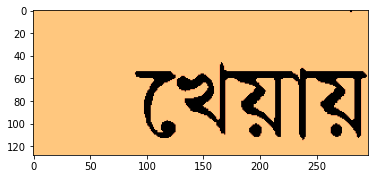

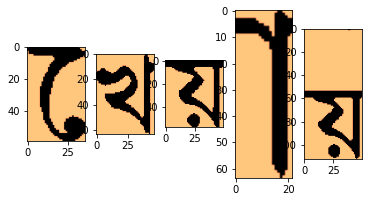

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 6, 8, 10, 11, 12, 13, 14, 14, 13, 13, 15, 18, 17, 23, 22, 19, 16, 14, 14, 13, 12, 12, 12, 12, 12, 13, 13, 14, 15, 16, 15, 14, 13, 11, 10, 9, 8, 8, 9, 8, 10, 46, 46, 46, 46, 46, 44, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 7, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 46, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 13, 16, 11, 13, 13, 12, 12, 11, 11, 11, 11, 11, 11, 12, 11, 11, 10, 10, 31, 33, 34, 34, 35, 17, 16, 16, 17, 16, 17, 18, 18, 18, 18, 18, 20, 22, 22, 23, 23, 23, 24, 24, 24, 26, 27, 23, 20, 16, 0, 0, 0, 0, 0, 0]
[0, 92, 113, 135, 193]


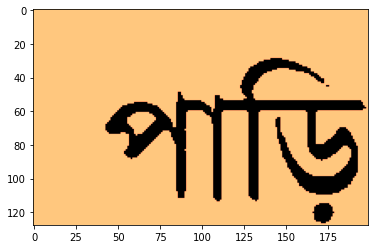

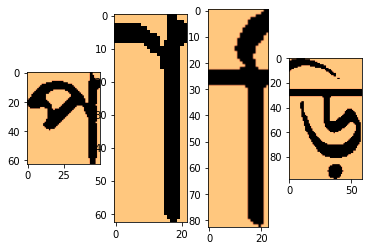

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 46, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 32, 33, 34, 35, 36, 36, 17, 16, 15, 14, 13, 13, 13, 11, 12, 12, 11, 10, 11, 11, 11, 10, 10, 11, 10, 11, 24, 31, 38, 39, 39, 39, 23, 18, 15, 11, 7, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 25, 28, 31, 37, 39, 25, 19, 17, 15, 12, 10, 9, 8, 7, 12, 12, 12, 12, 12, 12, 12, 12, 10, 8, 8, 7, 1, 1, 2, 3, 3, 8, 11, 13, 14, 17, 19, 21, 23, 27, 29, 30, 33, 33, 34, 30, 28, 24, 21, 19, 14, 12, 7, 6, 6, 6, 5, 6, 6, 7, 9, 46, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0]
[0, 51, 102, 184]


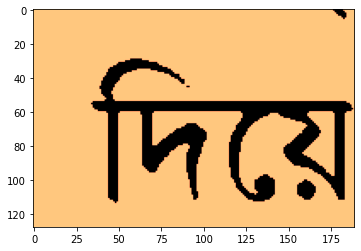

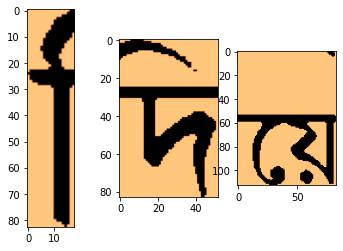

15
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 5, 10, 10, 10, 8, 5, 4, 0]
[0, 24]


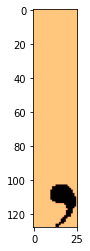

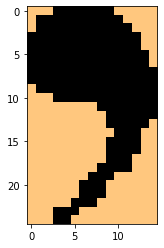

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 10, 11, 12, 13, 14, 14, 14, 13, 14, 17, 17, 18, 22, 22, 18, 14, 12, 12, 12, 12, 11, 12, 12, 11, 12, 14, 13, 16, 15, 14, 13, 13, 11, 10, 9, 8, 8, 9, 8, 9, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0, 0, 10, 12, 13, 15, 20, 21, 23, 24, 26, 26, 26, 27, 22, 17, 16, 15, 16, 16, 17, 18, 18, 20, 19, 19, 19, 23, 26, 26, 25, 20, 16, 12, 5, 5, 6, 8, 8, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 94, 145]


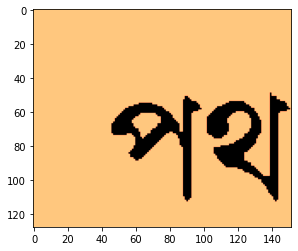

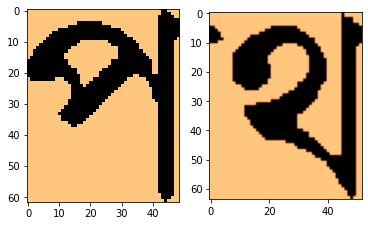

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 8, 9, 9, 9, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 15, 18, 20, 21, 22, 23, 23, 24, 24, 23, 23, 22, 21, 19, 18, 19, 18, 17, 18, 20, 20, 28, 26, 24, 21, 18, 14, 10, 8, 8, 8, 10, 14, 43, 45, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 1, 1, 3, 4, 4, 6, 46, 46, 46, 46, 46, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 5, 6, 6, 6, 13, 17, 19, 21, 23, 25, 26, 27, 27, 26, 26, 25, 25, 25, 28, 27, 25, 22, 20, 19, 13, 10, 8, 6, 7, 6, 6, 6, 9, 12, 46, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 5, 8, 46, 46, 46, 46, 46, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 8, 10, 12, 14, 15, 16, 17, 17, 22, 24, 22, 23, 22, 22, 21, 21, 21, 19, 15, 14, 15, 13, 12, 13, 12, 14, 14, 19, 26, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0]
[0, 96, 114, 167, 189, 235]


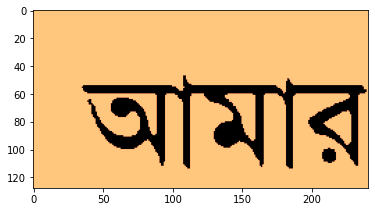

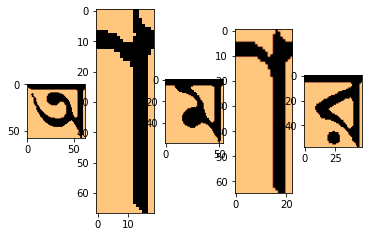

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 42, 43, 45, 46, 46, 46, 17, 12, 11, 11, 13, 12, 14, 14, 15, 17, 17, 19, 19, 19, 19, 21, 23, 27, 26, 24, 23, 20, 18, 14, 10, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 24, 26, 32, 36, 38, 26, 16, 17, 15, 11, 10, 9, 8, 7, 11, 12, 12, 12, 12, 13, 12, 11, 10, 8, 8, 7, 2, 0, 8, 15, 18, 21, 23, 25, 18, 16, 15, 14, 15, 20, 20, 22, 24, 23, 22, 22, 21, 20, 17, 16, 15, 8, 9, 11, 13, 14, 16, 11, 9, 8, 7, 7, 6, 7, 5, 6, 6, 11, 46, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 79, 117, 165]


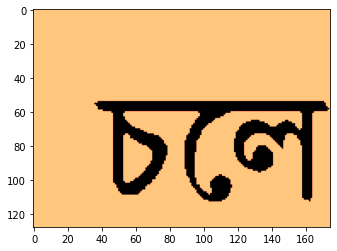

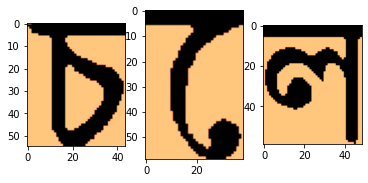

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 24, 29, 33, 36, 39, 21, 18, 17, 13, 11, 10, 9, 7, 7, 12, 13, 12, 12, 13, 12, 11, 11, 10, 8, 7, 5, 3, 0, 6, 9, 13, 15, 16, 16, 16, 17, 16, 18, 17, 16, 17, 19, 20, 19, 19, 19, 17, 20, 18, 16, 14, 11, 9, 3, 4, 4, 5, 6, 7, 6, 7, 7, 6, 7, 8, 10, 46, 46, 46, 46, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 10, 14, 19, 21, 23, 19, 16, 16, 16, 14, 14, 19, 21, 23, 24, 23, 23, 22, 21, 20, 17, 15, 10, 7, 9, 12, 14, 13, 12, 10, 9, 8, 7, 7, 7, 6, 6, 7, 7, 35, 46, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 68, 112, 168]


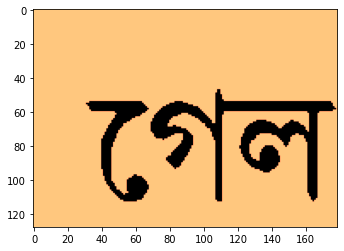

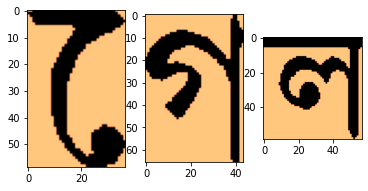

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 6, 10, 12, 13, 12, 11, 11, 12, 13, 15, 15, 17, 19, 20, 22, 24, 25, 27, 22, 20, 17, 14, 13, 12, 11, 10, 9, 9, 9, 8, 8, 7, 6, 7, 8, 9, 14, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 4, 6, 8, 46, 46, 46, 46, 46, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 5, 6, 6, 10, 15, 19, 21, 23, 24, 26, 27, 27, 27, 26, 26, 25, 25, 25, 27, 26, 25, 21, 17, 15, 11, 8, 7, 7, 6, 6, 7, 9, 9, 11, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 19, 25, 31, 35, 37, 25, 21, 18, 15, 12, 11, 10, 8, 7, 7, 12, 12, 13, 12, 13, 12, 11, 10, 9, 8, 7, 5, 0, 0, 0, 0, 11, 15, 17, 18, 20, 20, 20, 21, 22, 22, 22, 22, 22, 22, 21, 19, 12, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 10, 11, 38, 43, 46, 45, 41, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 81, 106, 156, 196, 238]


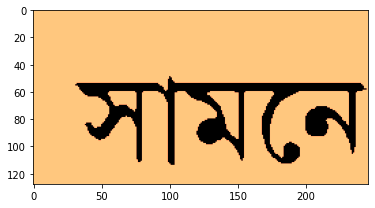

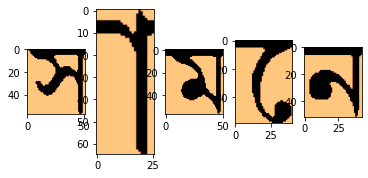

16
[0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 3, 3, 4, 6, 11, 11, 10, 8, 5, 0]
[0, 21]


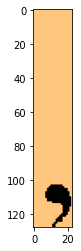

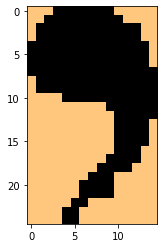

67
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 6, 10, 12, 13, 12, 12, 11, 12, 13, 15, 15, 17, 19, 20, 22, 25, 25, 27, 22, 20, 17, 14, 13, 12, 11, 10, 9, 9, 9, 8, 8, 7, 6, 7, 8, 9, 14, 46, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 4, 6, 8, 46, 46, 46, 46, 46, 1, 1, 0, 0, 0, 0, 0, 0, 1, 3, 3, 4, 5, 6, 6, 11, 15, 17, 20, 23, 24, 26, 27, 27, 27, 26, 25, 25, 25, 24, 27, 26, 24, 22, 19, 15, 12, 9, 7, 7, 7, 7, 7, 9, 11, 16, 46, 46, 46, 46, 46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 19, 25, 31, 34, 37, 25, 20, 18, 15, 12, 11, 10, 8, 7, 7, 12, 12, 13, 12, 13, 12, 11, 10, 9, 8, 7, 5, 0, 0, 2, 9, 13, 17, 19, 19, 20, 20, 21, 21, 22, 22, 22, 22, 22, 21, 17, 13, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 10, 15, 38, 40, 46, 46, 46, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 88, 113, 162, 203, 244]


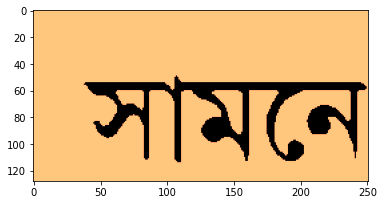

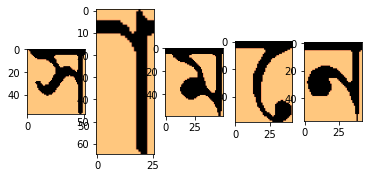

15
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 5, 7, 10, 9, 9, 8, 5, 0]
[0, 22]


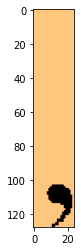

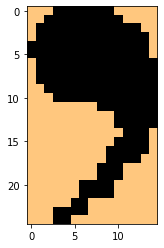

72
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 10, 13, 12, 12, 10, 9, 10, 10, 13, 18, 18, 22, 23, 23, 27, 27, 27, 26, 24, 23, 23, 25, 24, 25, 24, 23, 22, 20, 19, 17, 15, 14, 18, 22, 26, 29, 29, 29, 26, 26, 26, 27, 26, 28, 28, 33, 28, 15, 10, 7, 0]
[0, 144]


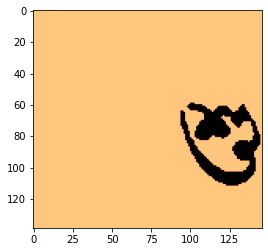

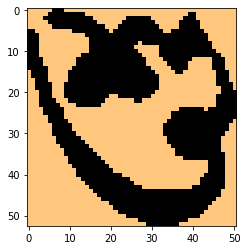

72
[0, 0, 0, 0, 0, 0, 0, 0, 5, 10, 16, 21, 22, 24, 26, 28, 28, 28, 26, 26, 25, 21, 20, 17, 17, 17, 16, 16, 16, 16, 15, 15, 14, 15, 16, 17, 22, 47, 49, 49, 49, 49, 49, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 3, 7, 9, 13, 20, 21, 23, 24, 24, 26, 26, 27, 28, 30, 33, 33, 31, 31, 32, 29, 26, 26, 26, 24, 25, 23, 24, 25, 25, 31, 30, 27, 23, 20, 17, 12, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 46, 54, 92, 100]


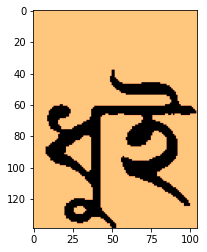

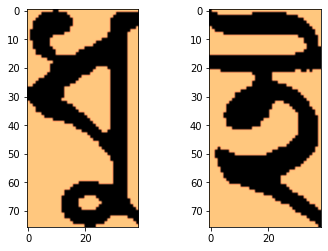

72
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 8, 11, 13, 13, 13, 12, 13, 14, 14, 14, 16, 18, 19, 22, 23, 24, 27, 28, 26, 21, 17, 16, 14, 13, 11, 10, 9, 9, 9, 9, 8, 9, 7, 7, 8, 11, 49, 49, 49, 49, 49, 49, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3, 4, 4, 5, 49, 49, 49, 49, 49, 49, 2, 1, 1, 0, 0, 1, 1, 1, 2, 3, 4, 5, 6, 7, 7, 7, 15, 19, 21, 23, 25, 27, 27, 28, 27, 26, 25, 26, 25, 26, 28, 27, 25, 23, 20, 18, 12, 9, 8, 8, 8, 8, 8, 7, 8, 13, 48, 49, 49, 49, 49, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 21, 27, 29, 35, 39, 34, 25, 20, 19, 17, 14, 12, 9, 8, 12, 13, 15, 15, 15, 15, 15, 15, 13, 13, 11, 11, 7, 1, 1, 1, 12, 13, 17, 19, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 22, 21, 14, 7, 8, 7, 7, 8, 8, 8, 8, 8, 8, 7, 6, 6, 9, 10, 39, 42, 44, 44, 45, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 94, 118, 175, 251, 267]


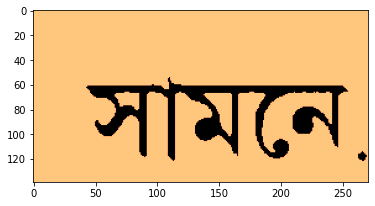

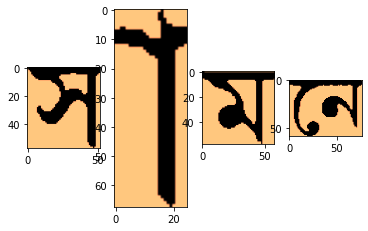

20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 4, 3, 2, 1, 0]
[0, 23]


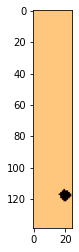

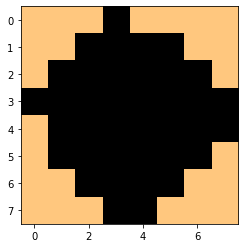

20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 4, 3, 2, 1, 0]
[0, 22]


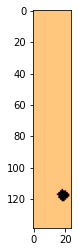

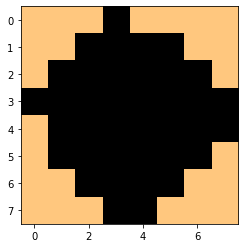

72
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 26, 29, 33, 39, 37, 25, 20, 19, 17, 14, 12, 10, 8, 12, 13, 15, 15, 15, 15, 15, 15, 13, 13, 11, 11, 8, 1, 1, 1, 1, 1, 29, 33, 34, 35, 36, 37, 19, 18, 16, 15, 15, 14, 13, 13, 13, 13, 12, 11, 11, 12, 11, 11, 11, 12, 11, 11, 12, 27, 37, 39, 42, 42, 42, 26, 17, 13, 10, 5, 4, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 4, 10, 13, 14, 17, 18, 20, 23, 25, 25, 23, 22, 21, 20, 22, 22, 22, 23, 24, 24, 24, 25, 26, 24, 20, 18, 18, 16, 13, 11, 6, 5, 6, 5, 5, 6, 6, 9, 42, 49, 49, 49, 49, 49, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 90, 146]


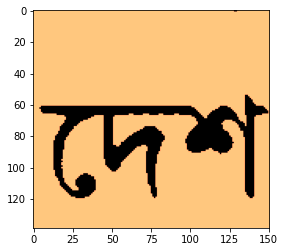

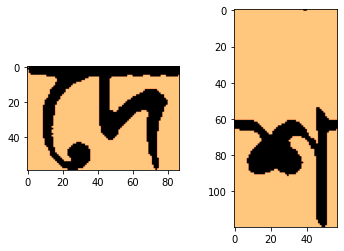

72
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 17, 22, 27, 33, 34, 38, 27, 23, 20, 18, 15, 14, 11, 9, 8, 7, 16, 15, 15, 15, 15, 15, 14, 13, 12, 11, 10, 7, 1, 1, 1, 1, 1, 2, 26, 27, 29, 34, 36, 23, 21, 20, 21, 20, 19, 22, 24, 22, 23, 25, 28, 31, 30, 30, 30, 29, 30, 30, 25, 22, 21, 21, 22, 21, 20, 19, 21, 23, 19, 17, 14, 7, 0, 0, 0, 0, 1, 1, 1, 1, 1, 17, 25, 26, 33, 37, 39, 28, 21, 21, 18, 14, 13, 11, 9, 8, 11, 16, 15, 15, 15, 15, 15, 14, 13, 11, 11, 9, 3, 1, 1, 7, 9, 14, 14, 15, 15, 14, 13, 11, 11, 12, 13, 12, 12, 12, 12, 12, 11, 13, 34, 35, 37, 37, 38, 21, 20, 19, 19, 19, 20, 20, 21, 21, 21, 20, 23, 24, 25, 26, 25, 25, 25, 24, 23, 24, 27, 23, 21, 15, 0, 0, 0, 0, 0, 0]
[0, 112, 200]


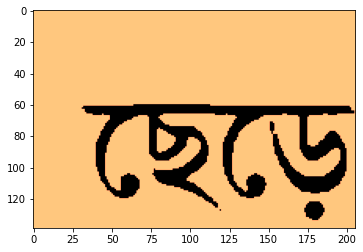

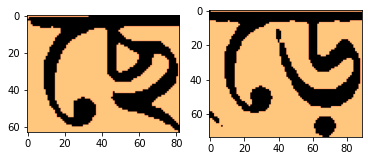

72
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 26, 30, 35, 39, 32, 25, 20, 19, 17, 14, 11, 9, 8, 11, 13, 15, 15, 15, 15, 15, 15, 13, 13, 11, 10, 7, 1, 1, 1, 1, 1, 30, 33, 34, 35, 36, 37, 19, 18, 16, 16, 14, 14, 13, 13, 13, 13, 12, 11, 11, 12, 12, 11, 11, 12, 11, 11, 12, 28, 37, 39, 42, 42, 42, 22, 17, 13, 9, 5, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 6, 10, 13, 14, 17, 18, 20, 23, 25, 25, 23, 22, 21, 20, 22, 22, 22, 23, 24, 24, 25, 25, 26, 23, 20, 18, 17, 16, 13, 11, 5, 6, 6, 5, 6, 6, 6, 9, 44, 49, 49, 49, 49, 49, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 49, 49, 49, 49, 49, 49, 2, 1, 1, 0, 0, 4, 7, 9, 11, 12, 12, 12, 11, 11, 13, 19, 23, 23, 24, 27, 26, 26, 26, 25, 24, 23, 23, 17, 13, 11, 19, 24, 23, 25, 26, 27, 29, 31, 32, 30, 30, 28, 29, 30, 32, 27, 34, 34, 33, 33, 31, 30, 25, 23, 17, 15, 6, 1, 0, 0, 0, 0, 1, 22, 27, 30, 35, 39, 32, 25, 20, 19, 17, 14, 11, 9, 8, 11, 13, 15, 15, 15, 15, 15, 

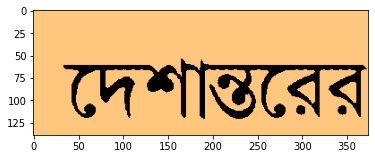

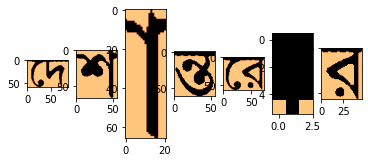

72
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 49, 49, 49, 49, 49, 49, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 32, 33, 34, 35, 36, 37, 19, 17, 16, 16, 15, 14, 13, 13, 13, 12, 12, 10, 12, 12, 12, 11, 11, 11, 10, 11, 12, 27, 37, 42, 42, 42, 41, 20, 17, 13, 8, 5, 3, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 24, 28, 30, 34, 38, 29, 24, 20, 18, 16, 13, 11, 9, 8, 12, 13, 15, 15, 15, 15, 15, 15, 13, 13, 11, 10, 5, 1, 1, 1, 3, 5, 8, 10, 11, 12, 15, 16, 16, 17, 18, 19, 18, 19, 18, 17, 16, 16, 15, 16, 15, 15, 15, 14, 14, 15, 13, 15, 19, 46, 48, 48, 49, 49, 49, 12, 9, 8, 7, 11, 15, 16, 19, 20, 20, 21, 21, 20, 19, 21, 23, 22, 19, 16, 12, 1, 1, 0, 0, 0, 0]
[0, 54, 56, 109, 204]


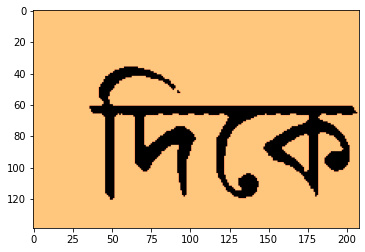

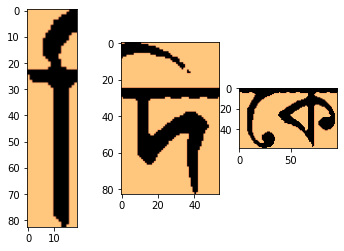

20
[0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 4, 5, 6, 9, 11, 12, 11, 8, 7, 6, 0]
[0, 20]


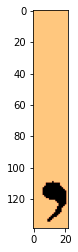

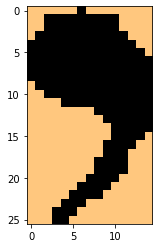

72
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 5, 9, 12, 12, 13, 13, 12, 13, 13, 14, 15, 16, 18, 19, 22, 23, 24, 29, 28, 26, 20, 16, 16, 14, 13, 11, 10, 9, 8, 9, 9, 8, 8, 8, 7, 8, 12, 49, 49, 49, 49, 49, 49, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 18, 23, 29, 34, 37, 39, 23, 22, 21, 17, 14, 13, 10, 8, 8, 13, 16, 16, 15, 16, 15, 15, 14, 13, 11, 11, 9, 5, 2, 2, 3, 4, 6, 9, 11, 14, 16, 18, 21, 22, 24, 25, 27, 29, 29, 28, 26, 24, 22, 20, 18, 17, 15, 12, 8, 5, 6, 6, 6, 6, 7, 10, 13, 49, 49, 49, 49, 49, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 49, 49, 49, 49, 49, 49, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 33, 34, 34, 36, 37, 37, 18, 17, 16, 15, 14, 14, 14, 13, 12, 11, 11, 11, 12, 12, 12, 11, 12, 11, 11, 11, 24, 34, 39, 42, 42, 42, 25, 19, 14, 11, 7, 6, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 3, 4, 4, 8, 11, 13, 15, 19, 20, 21, 23, 29, 31, 33, 36, 36, 38, 33, 31, 29, 25, 22, 16, 13, 10, 7, 6, 6, 6, 7

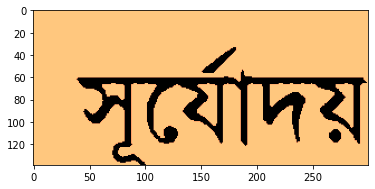

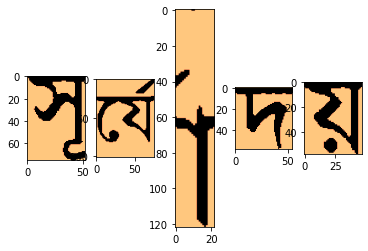

72
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 22, 25, 30, 35, 38, 41, 23, 19, 20, 16, 13, 12, 9, 8, 8, 13, 15, 15, 15, 15, 15, 15, 13, 12, 11, 10, 5, 1, 1, 1, 1, 1, 2, 26, 27, 28, 33, 37, 26, 23, 20, 20, 21, 20, 23, 23, 22, 23, 25, 29, 31, 30, 30, 30, 29, 29, 29, 28, 23, 22, 21, 22, 21, 20, 20, 21, 23, 21, 17, 13, 11, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 24, 28, 31, 37, 39, 29, 23, 19, 18, 16, 13, 11, 9, 8, 12, 13, 15, 15, 15, 15, 15, 15, 13, 11, 11, 9, 5, 1, 1, 1, 7, 9, 14, 14, 15, 15, 14, 12, 11, 11, 11, 12, 12, 12, 12, 12, 12, 11, 13, 35, 35, 37, 37, 38, 21, 20, 19, 19, 19, 20, 20, 21, 20, 21, 20, 23, 24, 25, 26, 25, 25, 25, 24, 23, 24, 27, 23, 21, 16, 1, 0, 0, 0, 0, 0]
[0, 115, 123, 205]


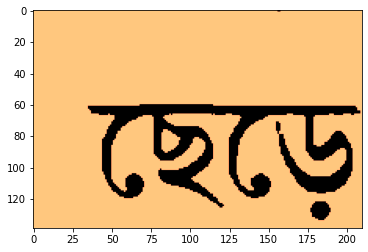

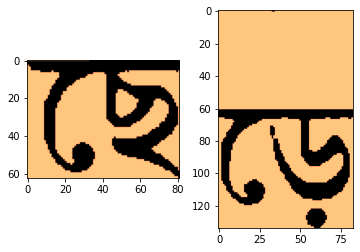

68
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 7, 9, 11, 13, 13, 13, 13, 13, 14, 15, 16, 16, 19, 20, 22, 24, 24, 29, 27, 23, 16, 15, 14, 13, 12, 11, 9, 10, 8, 8, 8, 7, 7, 6, 7, 10, 12, 47, 47, 47, 47, 47, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 3, 5, 8, 11, 13, 16, 18, 21, 22, 23, 25, 26, 27, 27, 28, 26, 23, 21, 19, 17, 15, 13, 11, 7, 5, 5, 5, 5, 6, 6, 8, 8, 47, 47, 47, 47, 47, 47, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 4, 4, 6, 47, 47, 47, 47, 47, 47, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 24, 28, 34, 36, 39, 24, 17, 17, 15, 12, 11, 10, 8, 7, 12, 13, 14, 13, 12, 13, 13, 11, 11, 11, 13, 13, 12, 12, 11, 11, 12, 14, 16, 17, 18, 17, 18, 17, 19, 19, 20, 23, 22, 25, 23, 21, 19, 16, 20, 23, 25, 29, 31, 32, 29, 29, 29, 31, 30, 30, 30, 29, 28, 29, 21

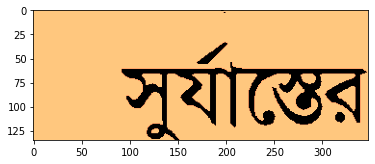

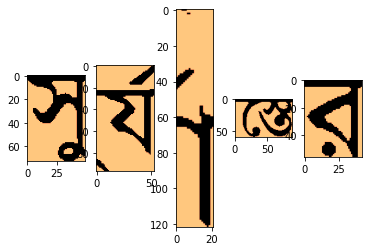

68
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 47, 47, 47, 47, 47, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 29, 32, 34, 35, 36, 36, 18, 17, 16, 15, 13, 13, 12, 12, 13, 12, 12, 11, 11, 10, 11, 11, 11, 10, 10, 11, 10, 12, 35, 40, 40, 39, 38, 25, 19, 12, 11, 8, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 23, 30, 34, 36, 39, 23, 18, 16, 14, 12, 11, 9, 8, 7, 13, 13, 14, 13, 13, 13, 11, 11, 11, 10, 9, 6, 5, 0, 1, 3, 5, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 18, 16, 17, 16, 15, 15, 15, 14, 16, 14, 13, 13, 13, 13, 13, 17, 22, 46, 47, 47, 47, 47, 13, 8, 8, 8, 8, 12, 13, 17, 19, 19, 19, 20, 19, 20, 19, 19, 22, 19, 17, 14, 0, 0, 0, 0, 0, 0, 0]
[0, 52, 103, 144, 200]


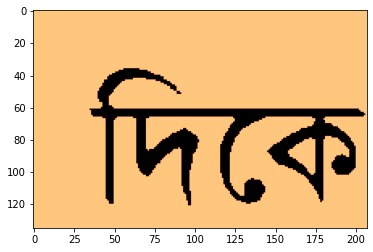

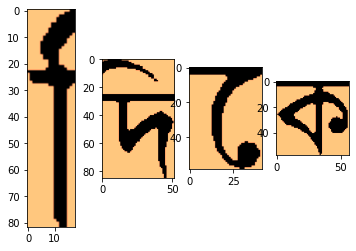

16
[0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 4, 6, 8, 11, 9, 9, 7, 0]
[0, 19]


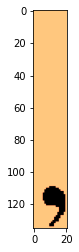

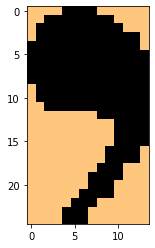

68
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 14, 17, 19, 14, 12, 11, 10, 10, 10, 17, 22, 26, 28, 31, 30, 27, 26, 25, 23, 23, 23, 23, 23, 25, 25, 26, 29, 31, 30, 25, 25, 23, 23, 22, 25, 24, 19, 7, 6, 7, 7, 7, 7, 20, 31, 36, 40, 40, 40, 26, 18, 15, 13, 9, 7, 5, 0, 0, 0, 0, 1, 1, 2, 3, 4, 4, 8, 46, 47, 47, 47, 47, 47, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 13, 16, 18, 19, 19, 21, 21, 21, 22, 22, 22, 22, 21, 21, 19, 16, 7, 7, 7, 7, 8, 7, 7, 7, 8, 7, 7, 6, 7, 9, 13, 21, 40, 45, 47, 47, 43, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 4, 5, 7, 47, 47, 47, 47, 47, 47, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 7, 10, 13, 13, 15, 16, 16, 17, 22, 23, 25, 23, 23, 22, 23, 22, 20, 20, 14, 15, 14, 14, 14, 13, 12, 13, 14, 18, 23, 47, 47, 47, 47, 47, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 104, 122, 171, 193, 239]


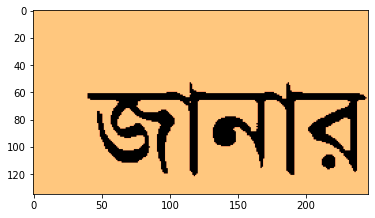

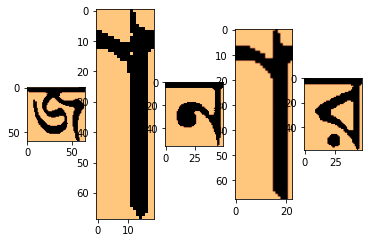

68
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 8, 11, 15, 17, 17, 17, 17, 17, 17, 18, 18, 19, 19, 20, 19, 18, 19, 19, 22, 20, 18, 15, 12, 10, 4, 4, 4, 5, 6, 7, 7, 7, 7, 6, 7, 8, 9, 42, 47, 47, 47, 43, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 10, 12, 13, 14, 16, 16, 16, 17, 16, 15, 14, 13, 12, 7, 6, 6, 6, 5, 7, 11, 13, 16, 14, 14, 15, 14, 12, 12, 11, 11, 11, 11, 11, 10, 12, 11, 29, 33, 35, 36, 37, 37, 18, 16, 17, 17, 17, 18, 19, 19, 19, 19, 21, 22, 22, 22, 22, 22, 21, 20, 20, 26, 23, 20, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 47, 47, 47, 47, 47, 47, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 84, 163, 183]


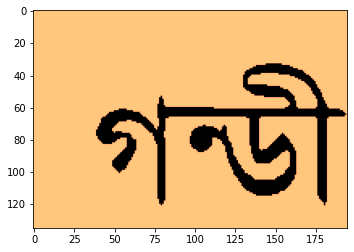

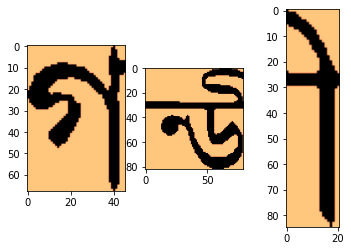

27
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 5, 6, 9, 10, 12, 13, 11, 0]
[0, 88]


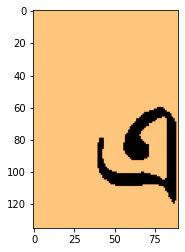

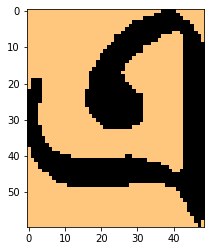

68
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 47, 47, 47, 47, 47, 47, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 7, 11, 14, 13, 13, 13, 12, 11, 11, 11, 11, 11, 11, 11, 10, 11, 10, 29, 33, 34, 35, 37, 36, 18, 16, 16, 16, 17, 17, 17, 18, 18, 20, 20, 20, 21, 22, 24, 24, 25, 24, 24, 23, 29, 25, 23, 19, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 19, 25, 32, 34, 37, 27, 20, 19, 16, 14, 12, 10, 9, 8, 8, 14, 14, 14, 13, 13, 13, 11, 11, 11, 9, 8, 7, 2, 3, 3, 4, 6, 10, 13, 14, 18, 19, 21, 22, 24, 28, 30, 32, 33, 34, 31, 28, 26, 24, 21, 17, 13, 11, 8, 5, 5, 5, 5, 5, 5, 9, 47, 47, 47, 47, 47, 47, 1, 0, 0, 0, 0, 0, 0]
[0, 24, 83, 161]


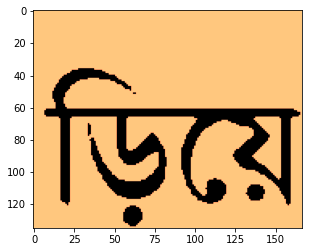

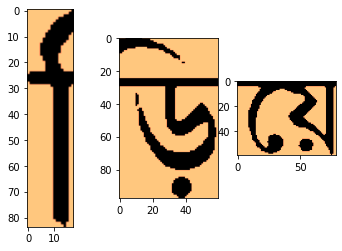

68
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 8, 9, 9, 8, 8, 8, 8, 8, 8, 9, 8, 8, 9, 9, 14, 18, 20, 21, 22, 23, 23, 24, 23, 23, 23, 21, 20, 19, 19, 17, 16, 17, 17, 20, 21, 27, 25, 24, 21, 18, 14, 9, 8, 8, 9, 11, 14, 44, 46, 47, 47, 47, 47, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 8, 10, 11, 12, 13, 14, 15, 14, 14, 14, 18, 18, 18, 23, 21, 19, 16, 14, 13, 13, 13, 13, 13, 13, 13, 14, 14, 15, 17, 16, 15, 14, 12, 10, 10, 9, 8, 7, 8, 8, 10, 47, 47, 47, 47, 47, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 47, 47, 47, 47, 47, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 5, 9, 10, 12, 13, 15, 16, 16, 17, 21, 24, 24, 23, 24, 23, 23, 21, 19, 19, 16, 15, 15, 14, 14, 12, 11, 12, 12, 14, 20, 47, 47, 47, 47, 47, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 40, 43, 46, 47, 47, 47, 16, 15, 13, 13, 13, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 24, 23, 21, 19, 16, 14, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 18, 24, 30, 34

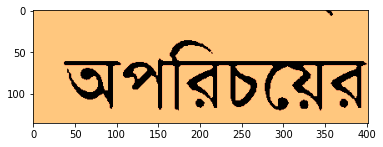

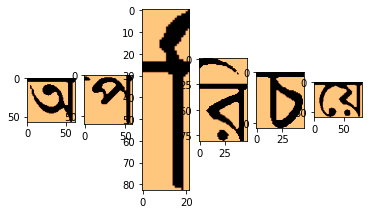

68
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 14, 14, 13, 12, 12, 11, 11, 11, 11, 11, 11, 10, 10, 11, 11, 33, 35, 36, 37, 37, 37, 20, 19, 17, 17, 18, 18, 18, 19, 20, 20, 22, 22, 22, 23, 21, 21, 20, 22, 26, 26, 23, 15, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 25, 28, 34, 38, 39, 21, 16, 16, 15, 12, 11, 9, 8, 7, 13, 13, 14, 13, 12, 13, 12, 11, 11, 10, 9, 6, 1, 1, 1, 3, 29, 30, 31, 32, 33, 16, 15, 14, 13, 12, 12, 11, 11, 11, 11, 10, 10, 12, 26, 28, 30, 33, 34, 34, 28, 26, 23, 19, 16, 14, 12, 10, 10, 10, 10, 9, 11, 30, 32, 33, 33, 26, 20, 17, 13, 11, 9, 6, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 24, 28, 30, 36, 39, 28, 20, 16, 16, 14, 11, 10, 9, 8, 12, 14, 13, 13, 13, 12, 13, 12, 11, 11, 9, 7, 4, 0, 0, 0, 0, 0, 8, 10, 12, 14, 17, 20, 21, 25, 25, 24, 22, 20, 20, 21, 21, 22, 23, 23, 24, 24, 25, 26, 26, 21, 19, 18, 16, 14, 12, 9, 5, 6, 6, 6, 6, 5, 7, 40, 44, 47, 47, 47, 47, 47, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

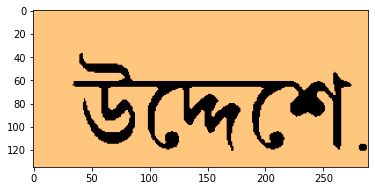

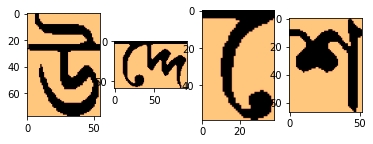

15
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0]
[0, 22]


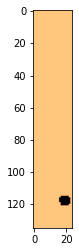

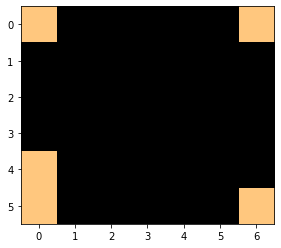

14
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 22]


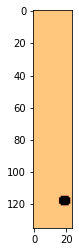

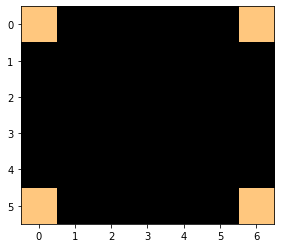

In [ ]:
 
all_chars=[]
for wrd in all_the_words:
 
    chars=[]
    
    plt.imshow(wrd,cmap=plt.cm.copper)
    #plt.show()
 
    sum_row=sum_of_row(wrd)
 
    head_line=sum_row.index(max(sum_row))
    for i in range(head_line,wrd.shape[0]):
        if sum_row[i]<sum_row[head_line]*0.97:
            head_line=i
            break
 
    bottom=wrd.shape[0]-1
 
    #distant between bottom and head_line
    dist=bottom-head_line
    print(dist)
 
 
    def get_char_split_point(wrd,lim=0):
        point=[]
        x=-1
        prev=1
        s=sum_of_col_custom(wrd,head_line,int(head_line+dist*0.68))
        print(s)
        for i in range(wrd.shape[1]-lim):
            x=x+1
            if sum(s[i:i+lim])==0 and prev==1:
                prev=0
                point.append(x)
            elif s[i]!=0:
                prev=1
            else:
                prev=0
            if i==(wrd.shape[1]-lim-1) and s[i]>0:
                point.append(x)
 
        return point
 
    csp=get_char_split_point(wrd,lim=1)
    print(csp)
 
    rev=csp[::-1] #reversed
 
    diff= [rev[i]-rev[i+1] for i in range(len(rev)-1)]
    max_diff=-1
    if(len(diff)>0):
         max_diff=max(diff)
    #maximum difference between two consecutive lines
     
    for i in range(len(csp)-1):
         x=csp[i]
         w=csp[i+1]-csp[i] #width     
         
     
         crop_img = wrd[:, x:x+w+1]
         if crop_img.size>0:
            sc=32.0/w
            #crop_img = cv2.resize(crop_img,(32,int(crop_img.shape[0]*sc)))
            if crop_img.size>0:
                crop_img=crop_sides(crop_img)
                if crop_img is not False:
                    chars.append(crop_img)
                    all_chars.append(crop_img)
 
 
    c=0
    cnt=0
    fig=plt.figure()
    for i in chars:
        cnt+=1
        fig.add_subplot(1,len(chars),cnt)
        plt.imshow(i,cmap=plt.cm.copper)
 
    plt.show()

In [ ]:
'''
import os
datadir="/content/drive/My Drive/Thesis_files/data/"
i=0
for char in all_chars:
    s="{:04d}".format(i)+".png"
    path = os.path.join(datadir,"temporary/",s)
    ####cv2.imwrite(path,255-char)
    i=i+1
'''
pass